# Dissertation using US Core Fundamentals Dataset - Second Model

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from scipy import stats

C:\Users\Selim\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing Dataset

In [2]:
#importing dataset
data = pd.read_csv('C:\\Users\\Selim\\Desktop\\Masters\\Final Project\\Datasets\\US Core\\US Core.csv')
data.head(5)

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
0,A,ARQ,31/03/2015,05/06/2015,30/04/2015,01/06/2020,-270000000.0,7.412000e+09,NaN,3.620000e+09,...,333191751.0,334000000.0,337000000.0,2.883,4.555000e+09,0.0,8000000.0,0.0,13.638,2.690000e+09
1,A,ARQ,30/06/2015,02/09/2015,31/07/2015,01/06/2020,-332000000.0,7.251000e+09,NaN,3.478000e+09,...,331403231.0,332000000.0,334000000.0,3.054,4.401000e+09,0.0,23000000.0,0.0,13.256,2.625000e+09
2,A,ARQ,30/09/2015,21/12/2015,31/10/2015,01/06/2020,-391000000.0,7.479000e+09,NaN,3.686000e+09,...,332170890.0,330000000.0,332000000.0,3.136,4.668000e+09,0.0,0.0,0.0,14.145,2.710000e+09
3,A,ARQ,31/12/2015,08/03/2016,31/01/2016,01/06/2020,-438000000.0,7.302000e+09,NaN,3.399000e+09,...,327770081.0,329000000.0,332000000.0,3.125,4.311000e+09,0.0,19000000.0,0.0,13.103,2.452000e+09
4,A,ARQ,31/03/2016,07/06/2016,30/04/2016,01/06/2020,-299000000.0,7.640000e+09,NaN,3.488000e+09,...,325521700.0,326000000.0,328000000.0,3.126,4.594000e+09,0.0,26000000.0,0.0,14.092,2.355000e+09


In [3]:
data.ticker.value_counts()

HMC     162
BTE     153
TM      144
CIGI    141
TRI     135
       ... 
WPF       4
BITI      4
PGLA      4
BCAR      4
HECC      4
Name: ticker, Length: 7054, dtype: int64

In [4]:
#converting calendar dates from string to dates using datetime function
data['calendardate'] = pd.to_datetime(data['calendardate'], format="%d/%m/%Y")

# Creating dataframes for time-series analysis and smoothing

## Final Dataframe to store predictor variables

In [5]:
ticker_list = data.ticker.unique()
ticker_list

array(['A', 'AA', 'AAAP', ..., 'ERES', 'UDFI', 'ACEV'], dtype=object)

In [6]:
final = pd.DataFrame(index = ticker_list)

In [7]:
final.loc['AAPL']

Series([], Name: AAPL, dtype: float64)

In [8]:
final.head()

""
A
AA
AAAP
AACG
AAL


# Extracting Separate Financial Accounts

In [9]:
def ExtractFinAccount(column):
    #creating revenue table from full dataset from independant time-series analysis
    account = data[["ticker", "dimension", "calendardate", column]].copy()
    
    #selecting rows of data where dimension is equal to ARQ, which are rows of data for quarterly financial reporting of 
    #companies without financial restatements.
    #change later to including restatements and explain why that is better from fundamental analysis perspective.
    account = account[account.dimension.str.contains('ARQ')==True]
    
    #deleting dimension column as it is no longer needed
    del account["dimension"]
    
    #using pivot table to get reshape revenue dataframe to have revenue as the values, ticker as the index and dates on the
    #columns
    account = account.pivot_table(values=column, index='ticker', columns='calendardate')
    
    return account

In [10]:
def ExtractFinAccount2(column):
    #creating revenue table from full dataset from independant time-series analysis
    account = data[["ticker", "dimension", "calendardate", column]].copy()
    
    #selecting rows of data where dimension is equal to ARQ, which are rows of data for quarterly financial reporting of 
    #companies without financial restatements.
    #change later to including restatements and explain why that is better from fundamental analysis perspective.
    account = account[account.dimension.str.contains('ARY')==True]
    
    #deleting dimension column as it is no longer needed
    del account["dimension"]
    
    #using pivot table to get reshape revenue dataframe to have revenue as the values, ticker as the index and dates on the
    #columns
    account = account.pivot_table(values=column, index='ticker', columns='calendardate')
    
    return account

In [11]:
#extractions

#revenue
#rev = ExtractFinAccount('revenue')

#gross profit margin
#gpm = ExtractFinAccount('gp')

#operating income
oi = ExtractFinAccount('opinc')

#net income
ni = ExtractFinAccount('netinc')

#net cash flow from operations
ncfo = ExtractFinAccount('ncfo')

#free cash flow per share
fcfps = ExtractFinAccount('fcfps')

#ros
ros = ExtractFinAccount2('ros')

#roe
roe = ExtractFinAccount2('roe')

#roa
roa = ExtractFinAccount2('roa')

#asset turnover
at = ExtractFinAccount2('assetturnover')

#tangible assets book value per share
#tbvps = ExtractFinAccount('tbvps')

#book value per share
bvps = ExtractFinAccount('bvps')

#investments
inv = ExtractFinAccount('investments')

#current debt
dbtc = ExtractFinAccount('debtc')

#debt to equity ratio
de = ExtractFinAccount('de')

#current ratio
cr = ExtractFinAccount('currentratio')

#working capital
wc = ExtractFinAccount('workingcapital')

#dividends per basic common share
dps = ExtractFinAccount('dps')

#dividend yield
dy = ExtractFinAccount('divyield')

#payout ratio
pay = ExtractFinAccount('payoutratio')

#payment of dividends & other cash distributions
payd = ExtractFinAccount('ncfdiv')

#operating expenses
opex = ExtractFinAccount('opex')

#earnings per diluted share
epds = ExtractFinAccount('epsdil')

#total assets
assets = ExtractFinAccount('assets')

#inventory
invt = ExtractFinAccount('inventory')

#total liabilities
liab = ExtractFinAccount('liabilities')

#ebitda margin
ebitdam = ExtractFinAccount('ebitdamargin')

#invested capital
invcap = ExtractFinAccount('invcap')

#return on invested capital
roic = ExtractFinAccount2('roic')

#sales per share
sps = ExtractFinAccount('sps')

#price to earnings ratio
pe = ExtractFinAccount('pe1')

#price to sales ratio
ps = ExtractFinAccount('ps1')

#price to book ratio
pb = ExtractFinAccount('pb')

#market capitalization
marcap = ExtractFinAccount('marketcap')

# Checking for & Deleting Missing Values

In [12]:
def MissingValues(df):
    
    #dropping data for 2020 since there is insufficient data coverage for the companies in the dataset
    del df["2020-03-31"]
    del df["2020-06-30"]
    
    #checking for rows of data where there is missing values across all columns
    df.isna().sum()
    
    #dropping rows of data where there is missing values since it cannot be replaced with an algorithm due to its sensitivity
    df = df.dropna()
    
    #dropping rows of data where there is a missing value indicated with a zero
    df = df[(df != 0).all(1)]
    
    return df

In [13]:
def MissingValues2(df):
    
    #dropping data for 2020 since there is insufficient data coverage for the companies in the dataset
    del df["2020-12-31"]
    
    #checking for rows of data where there is missing values across all columns
    df.isna().sum()
    
    #dropping rows of data where there is missing values since it cannot be replaced with an algorithm due to its sensitivity
    df = df.dropna()
    
    #dropping rows of data where there is a missing value indicated with a zero
    df = df[(df != 0).all(1)]
    
    return df

In [14]:
#OPTION 1

#deleting missing values

#revenue
#rev = MissingValues(rev)

#gross profit margin
#gpm = MissingValues(gpm)

#operating income
oi = MissingValues(oi)

#net income
ni = MissingValues(ni)

#net cash flow from operations
ncfo = MissingValues(ncfo)

#free cash flow per share
fcfps = MissingValues(fcfps)

#return on sales
ros = MissingValues2(ros)

#return on equity
roe = MissingValues2(roe)

#return on assets
roa = MissingValues2(roa)

#asset turnover
at = MissingValues2(at)

#tangible assets book value per share
#tbvps = MissingValues(tbvps)

#book value per share
bvps = MissingValues(bvps)

#investments
inv = MissingValues(inv)

#current debt
dbtc = MissingValues(dbtc)

#debt to equity ratio
de = MissingValues(de)

#current ratio
cr = MissingValues(cr)

#working capital
wc = MissingValues(wc)

#dividends per share
dps = MissingValues(dps)

#dividend yield
dy = MissingValues(dy)

#payout ratio
pay = MissingValues(pay)

#payment of dividends & other cash distributions
payd = MissingValues(payd)

#operating expenses
opex = MissingValues(opex)

#earnings per diluted share
epds = MissingValues(epds)

#total assets
assets = MissingValues(assets)

#inventory
invt = MissingValues(invt)

#total liabilities
liab = MissingValues(liab)

#ebitda margin
ebitdam = MissingValues(ebitdam)

#invested capital
invcap = MissingValues(invcap)

#return on invested capital
roic = MissingValues2(roic)

#sales per share
sps = MissingValues(sps)

#price to earnings ratio
pe = MissingValues(pe)

#price to sales ratio
ps = MissingValues(ps)

#price to book ratio
pb = MissingValues(pb)

#market capitalization
marcap = MissingValues(marcap)

In [707]:
pb.head()

calendardate,2015-03-31,2015-06-30,2015-09-30,2015-12-31,2016-03-31,2016-06-30,2016-09-30,2016-12-31,2017-03-31,2017-06-30,2017-09-30,2017-12-31,2018-03-31,2018-06-30,2018-09-30,2018-12-31,2019-03-31,2019-06-30,2019-09-30,2019-12-31
ticker,,,,,,,,,,,,,,,,,,,,
A,3.230,2.870,3.255,3.086,3.578,3.5190,3.504,3.856,4.417,4.519,4.515,4.857,4.295,4.698,4.547,5.028,4.124,4.636,5.521,5.130
AAL,13.211,7.322,7.652,4.351,4.690,4.4680,4.790,6.170,6.267,6.619,5.892,6.361,-19.485,-21.208,-26.248,-95.391,-23.123,-640.987,80.521,-102.290
AAMC,-2.991,-1.452,-0.308,-0.185,-0.170,-0.1195,-0.293,-0.585,-0.617,-0.700,-0.655,-0.531,-0.527,-0.557,-0.408,-0.279,-0.186,-0.086,-0.104,-0.166
AAME,0.726,0.710,0.977,0.824,0.778,0.7690,0.693,0.755,0.677,0.618,0.672,0.587,0.598,0.478,0.632,0.520,0.442,0.438,0.309,0.415
AAN,1.969,2.023,1.342,1.221,1.310,1.1950,1.216,1.312,1.757,2.127,1.760,1.884,1.696,1.937,1.707,2.053,2.204,2.281,2.656,1.746


In [15]:
roic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3899 entries, A to ZYXI
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   2015-12-31 00:00:00  3899 non-null   float64
 1   2016-12-31 00:00:00  3899 non-null   float64
 2   2017-12-31 00:00:00  3899 non-null   float64
 3   2018-12-31 00:00:00  3899 non-null   float64
 4   2019-12-31 00:00:00  3899 non-null   float64
dtypes: float64(5)
memory usage: 182.8+ KB


# Feature Engineering

## Target Variable

In [16]:
target = ExtractFinAccount('price')

In [17]:
#extracting the two years required to make the target variable calculation
target19 = target['2019-12-31'].copy()
target18 = target['2018-12-31'].copy()

In [18]:
#calculating difference in stock value between 2019 and 2018
target = pd.DataFrame(target19-target18)

#dropping rows with missing values before calculation of target variable
target = target.dropna()

In [19]:
target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4251 entries, A to ZYXI
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4251 non-null   float64
dtypes: float64(1)
memory usage: 66.4+ KB


In [20]:
target.columns = ['Stock Price % Change']

In [21]:
#Determining whether share price experienced growth or decline in 2019.
#Shares that have experienced growth in value will be labelled as "1" and declining shares will be labelled as "0".

lst = []
for x in target['Stock Price % Change']:
    if x > 0:
        lst.append('1')
    else:
        lst.append('0')

target['Stock Price y-o-y Movement'] = lst

In [22]:
#creating new empty dataframe for target variable
label = pd.DataFrame(index = ticker_list, columns = ['Stock Price y-o-y Movement'])

In [23]:
#adding results from creation of target variable to new dataframe
label['Stock Price y-o-y Movement'] = target['Stock Price y-o-y Movement']

In [24]:
# dropping rows with missing values from dataframe
label = label.dropna()

In [25]:
label.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4251 entries, A to SRGA
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Stock Price y-o-y Movement  4251 non-null   object
dtypes: object(1)
memory usage: 66.4+ KB


In [26]:
label.head(20)

,Stock Price y-o-y Movement
A,1
AA,0
AAL,0
AAMC,0
AAME,0
AAN,0
AAOI,0
AAON,1
AAP,0
AAPL,1


In [27]:
final['Class'] = label.copy()

# Exponential Smoothing

# Decaying Exponential Moving Average

Specify decay in terms of half-life, α=1−exp(−ln(2)/halflife), for halflife>0.

If times is specified, the time unit (str or timedelta) over which an observation decays to half its value. Only applicable to mean() and halflife value will not apply to the other functions.

Minimum number of observations in window required to have a value (otherwise result is NA).

adjustbool, default True
Divide by decaying adjustment factor in beginning periods to account for imbalance in relative weightings (viewing EWMA as a moving average).

When adjust=True (default), the EW function is calculated using weights wi=(1−α)i. For example, the EW moving average of the series [x0,x1,...,xt] would be:

yt=xt+(1−α)xt−1+(1−α)2xt−2+...+(1−α)tx01+(1−α)+(1−α)2+...+(1−α)t

When adjust=False, the exponentially weighted function is calculated recursively:

y0yt=x0=(1−α)yt−1+αxt,

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [29]:
def EWM(stock, stock_name, df):
    
    #converting each company into separate time series dataframe
    stock = pd.DataFrame(df.loc[stock_name])
    
    #applying first differences technique to make time series data stationary
    stock = stock.diff().dropna()
    
    #applying exponential weighted average with a half-life of 4
    stock_ema = stock.ewm(halflife=4, min_periods = 0, adjust = True).mean()
       
    #creating separate array for time periods and for ema results
    dates = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
    ema = stock_ema.values
    
    #transforming both arrays into the same type and shape for application of linear regression and extraction of slope
    dates = dates.astype(np.float64)
    dates = dates.reshape(1, 19)
    ema = ema.astype(np.float64)
    ema = ema.reshape(1, 19)
        
    #linear regression and extraction of slope
    slope, intercept, r_value, p_value, std_err = stats.linregress(dates, ema)
    
    ticker_list = df.index.unique()
    
    return slope

In [30]:
def EWMAnnual(stock, stock_name, df):
    
    #converting each company into separate time series dataframe
    stock = pd.DataFrame(df.loc[stock_name])
    
    #applying first differences technique to make time series data stationary
    stock = stock.diff().dropna()
    
    #applying exponential weighted average with a half-life of 1 instead of 4 to adjust to annual time series data
    stock_ema = stock.ewm(halflife=1, min_periods = 0, adjust = True).mean()
       
    #creating separate array for time periods and for ema results
    dates = np.array([0, 1, 2, 3])
    ema = stock_ema.values
    
    #transforming both arrays into the same type and shape for application of linear regression and extraction of slope
    dates = dates.astype(np.float64)
    dates = dates.reshape(1, 4)
    ema = ema.astype(np.float64)
    ema = ema.reshape(1, 4)
        
    #linear regression and extraction of slope
    slope, intercept, r_value, p_value, std_err = stats.linregress(dates, ema)
    
    ticker_list = df.index.unique()
    
    return slope

In [31]:
def RunEWM(df):
    
    results_list = []
    
    for ind, row in df.iterrows():
        results_list.append(EWM(ind, ind, df))
        
    ticker_list = df.index.unique()
    
    df = pd.DataFrame(results_list, index = ticker_list)
    
    return df

In [32]:
def RunEWMAnnual(df):
    
    results_list = []
    
    for ind, row in df.iterrows():
        results_list.append(EWMAnnual(ind, ind, df))
        
    ticker_list = df.index.unique()
    
    df = pd.DataFrame(results_list, index = ticker_list)
    
    return df

In [716]:
def EWMPlot(stock_name, df):
    
    stock = pd.DataFrame(df.loc[stock_name])
    
    stock_orig = stock.copy()
    
    #applying first differences technique to make time series data stationary
    stock_diff = stock.diff().dropna()
    
    #applying exponential weighted average with a half-life of 4
    stock_ema = stock_diff.ewm(halflife=4, min_periods = 0, adjust = True).mean()
    
    #creating separate array for time periods and for ema results
    dates = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
    ema = stock_ema.values
    
    #transforming both arrays into the same type and shape for application of linear regression and extraction of slope
    dates = dates.astype(np.float64)
    dates = dates.reshape(1, 19)
    ema = ema.astype(np.float64)
    ema = ema.reshape(1, 19)
        
    #linear regression and extraction of slope
    slope, intercept, r_value, p_value, std_err = stats.linregress(dates, ema)
    
    ticker_list = df.index.unique()

    plt.figure(figsize = (22, 8))
    #plt.plot(stock_orig, label = 'Original')
    plt.plot(stock_diff, label = 'First Differences')
    plt.plot(stock_ema, label = 'EWM')
    plt.legend(loc = 'best', fontsize = 'xx-large')
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 14)
    plt.show()

In [34]:
def EWMPlotAnnual(stock_name, df):
    
    stock = pd.DataFrame(df.loc[stock_name])
    
    stock_orig = stock.copy()
    
    #applying first differences technique to make time series data stationary
    stock_diff = stock.diff().dropna()
    
    #applying exponential weighted average with a half-life of 1
    stock_ema = stock_diff.ewm(halflife=4, min_periods = 0, adjust = True).mean()
    
    #creating separate array for time periods and for ema results
    dates = np.array([0, 1, 2, 3])
    ema = stock_ema.values
    
    #transforming both arrays into the same type and shape for application of linear regression and extraction of slope
    dates = dates.astype(np.float64)
    dates = dates.reshape(1, 4)
    ema = ema.astype(np.float64)
    ema = ema.reshape(1, 4)
        
    #linear regression and extraction of slope
    slope, intercept, r_value, p_value, std_err = stats.linregress(dates, ema)
    
    ticker_list = df.index.unique()

    plt.figure(figsize = (22, 8))
    #plt.plot(stock_orig, label = 'Original')
    plt.plot(stock_diff, label = 'First Differences')
    plt.plot(stock_ema, label = 'EWM')
    plt.legend(loc = 'best', fontsize = 'xx-large')
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 14)
    plt.show()

In [35]:
#OPTION 1

#running EWM for all features with quarterly time-series data

final['OI'] = RunEWM(oi)
final['NI'] = RunEWM(ni)
final['NCFO'] = RunEWM(ncfo)
final['FCFPS'] = RunEWM(fcfps)
final['BVPS'] = RunEWM(bvps)
final['DE'] = RunEWM(de)
final['OPEX'] = RunEWM(opex)
final['EPDS'] = RunEWM(epds)
final['ASSETS'] = RunEWM(assets)
final['LIAB'] = RunEWM(liab)
final['INVCAP'] = RunEWM(invcap)
final['EBITDAM'] = RunEWM(ebitdam)
final['SPS'] = RunEWM(sps)
final['PE'] = RunEWM(pe)
final['PS'] = RunEWM(ps)
final['PB'] = RunEWM(pb)
final['ROS'] = RunEWMAnnual(ros)
final['ROE'] = RunEWMAnnual(roe)
final['ROA'] = RunEWMAnnual(roa)
final['ROIC'] = RunEWMAnnual(roic)
final['MARCAP'] = RunEWM(marcap)

C:\Users\Selim\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\Selim\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Selim\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Selim\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\Selim\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in sqrt
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [36]:
final.head(10)

,Class,OI,NI,NCFO,FCFPS,BVPS,DE,OPEX,EPDS,ASSETS,...,EBITDAM,SPS,PE,PS,PB,ROS,ROE,ROA,ROIC,MARCAP
A,1,-1.063728e+06,-2.812251e+05,4.206221e+05,0.002734,0.009339,0.000402,4.434258e+05,-0.000654,7.972101e+06,...,-0.000847,-0.001218,0.010975,-0.013461,0.008702,-0.007236,0.008486,0.004625,-0.005206,5.219613e+07
AA,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.027459,NaN,NaN,NaN,NaN
AAAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AACG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-14.786145,-0.070276,-0.048341,-0.325836,NaN
AAL,0,-1.668361e+07,-2.322928e+07,1.760977e+07,0.031958,-0.127880,-4.527998,1.800659e+06,-0.035876,6.014847e+06,...,-0.001751,-0.036647,0.153959,0.005187,-0.863571,-0.002735,-1.382390,0.030480,0.001884,2.504552e+08
AAMC,0,7.354776e+05,2.482595e+05,-4.033641e+05,0.127096,0.142368,-0.045539,4.051847e+05,0.094397,1.629441e+07,...,0.002519,0.499769,0.315865,-0.007224,-0.061480,0.147842,-0.006164,0.034691,0.077832,1.024826e+07
AAME,0,-4.032364e+04,-3.520641e+04,-1.496909e+05,-0.007217,0.006156,-0.002520,4.309098e+03,NaN,1.384420e+05,...,-0.000902,-0.000305,-0.398721,-0.002079,-0.003796,-0.000442,-0.000964,-0.000093,-0.000069,-3.243892e+05
AAN,0,3.725736e+05,-7.525623e+03,5.823768e+06,0.080917,0.004362,0.003379,1.720605e+06,-0.000131,3.596356e+06,...,0.000901,0.036378,0.557114,0.005748,0.013868,-0.007975,-0.023112,-0.014697,-0.016219,1.920921e+07
AAOI,0,-3.877945e+05,-4.020499e+05,-6.212868e+05,-0.022962,-0.042359,-0.002089,5.375453e+03,-0.022038,-1.287156e+06,...,-0.004905,-0.055506,0.567870,-0.015569,-0.024408,-0.075030,-0.094461,-0.062057,-0.060219,-7.309170e+06
AAON,1,-1.631274e+05,-9.906337e+04,-2.053573e+05,-0.002516,0.003798,-0.000269,-1.916912e+04,-0.001885,1.863779e+05,...,-0.000874,-0.006159,0.139064,0.006325,0.013530,-0.008040,-0.013192,-0.011585,-0.015061,5.560735e+06


In [37]:
final = final.dropna()

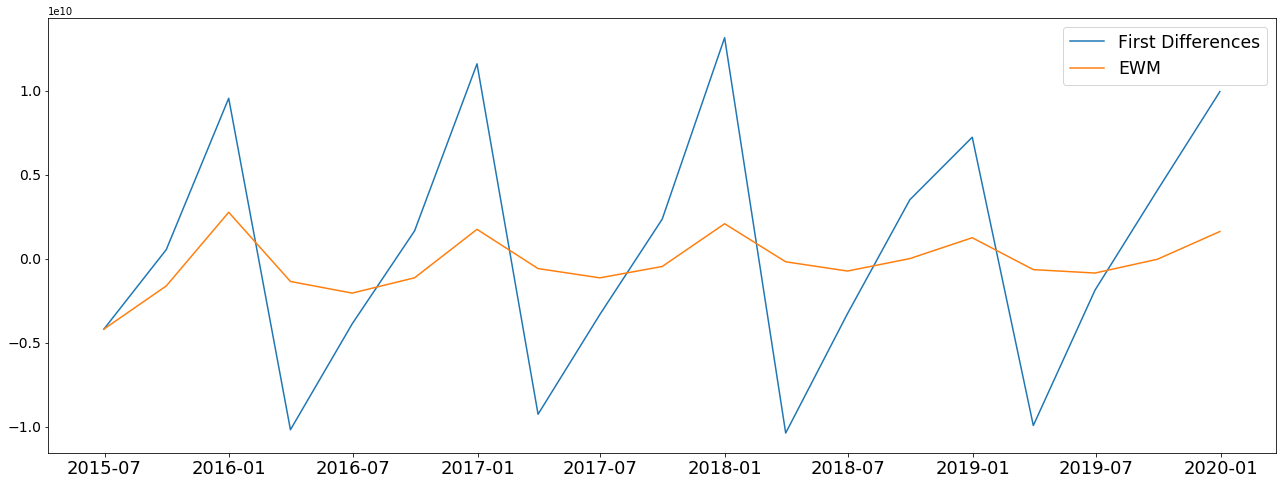

In [717]:
EWMPlot('AAPL', oi)

## Plotting Examples for Visualization (AAPL: Apple) & (AMZN: Amazon)

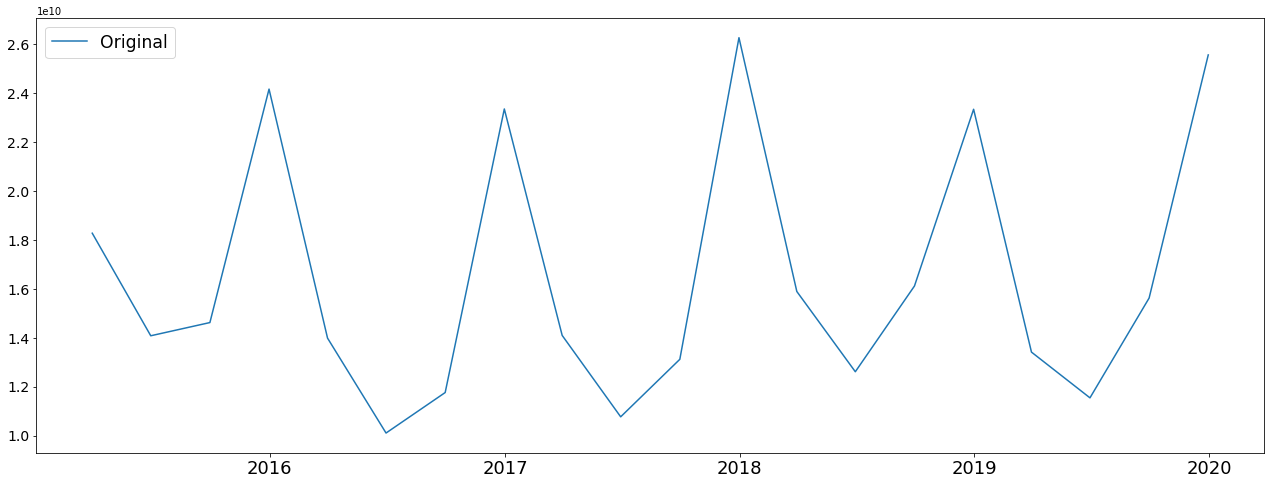

In [715]:
EWMPlot('AAPL', oi)

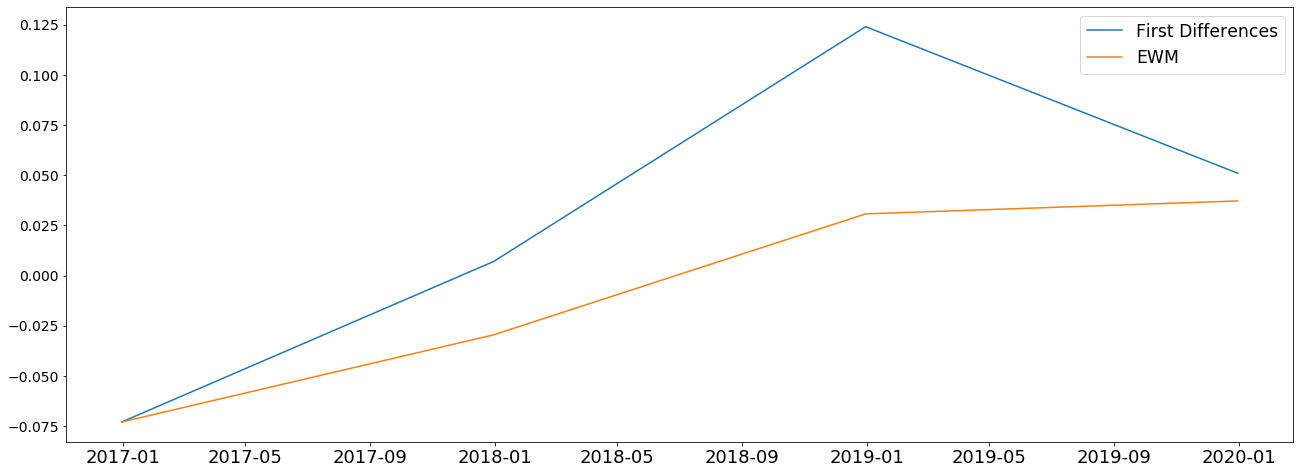

In [39]:
EWMPlotAnnual('AAPL', roe)

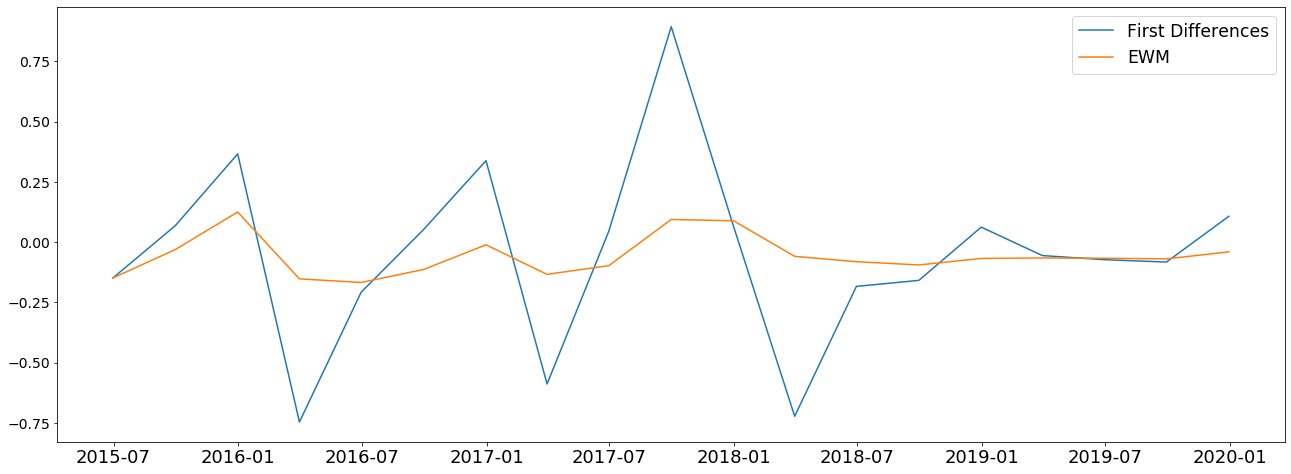

In [40]:
EWMPlot('AMZN', de)

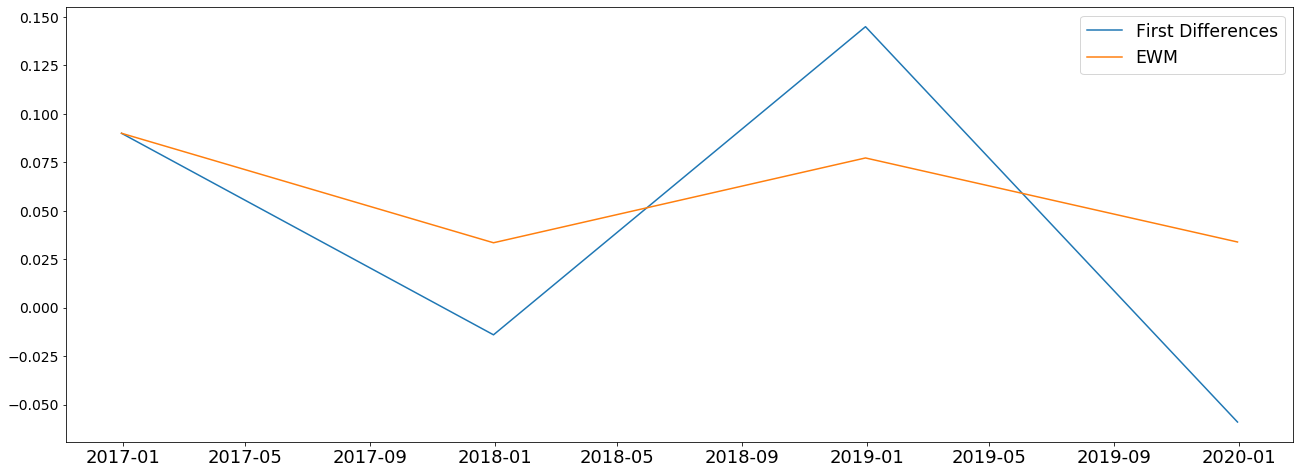

In [41]:
EWMPlotAnnual('AMZN', roe)

# Anomaly Detection - Removing Outliers

## IQR Range Rule Method

Formula = Lower threhsold is (first quartile - (1.5 * IQR)) and maximum threshold is (third quartile + (1.5 * IQR)).

Any value that is below the lower threshold or above the maximum threhsold will be considered an outlier and removed from the data.

In [42]:
def IQROutlierDetection(df):
    
    df = pd.DataFrame(df)

    first_quartile = df.quantile(0.25)
    third_quartile = df.quantile(0.75)
    IQR = third_quartile - first_quartile
    IQR_mul = IQR*1.5
    max_threshold = third_quartile + IQR_mul
    min_threshold = first_quartile - IQR_mul

    
    for index, row in df.iterrows():
        if (row > max_threshold).all():
            df.drop(index, inplace=True)
        else:
            if (row < min_threshold).all():
                df.drop(index, inplace = True)
                
    return df

In [43]:
#creating separate dataframe to store data output from IQR outlier detection method before proceeding wtih z-score method
final_iqr = final.copy()
del final_iqr['Class']

In [44]:
len(final_iqr)

2220

{'whiskers': [<matplotlib.lines.Line2D at 0x1769e39fcf8>,
 'caps': [<matplotlib.lines.Line2D at 0x1769e3ab3c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1769e39f908>],
 'medians': [<matplotlib.lines.Line2D at 0x1769e3aba58>],
 'fliers': [<matplotlib.lines.Line2D at 0x1769e3abda0>],
 'means': []}

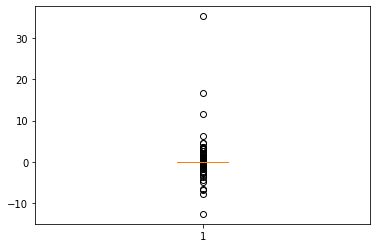

In [45]:
#displaying box plot example of outliers is some of the variables before performing outlier detection

plt.boxplot(final_iqr['DE'])

In [46]:
#displaying box plot example of outliers is some of the variables before performing outlier detection

#plt.boxplot(final_iqr['ROE'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1769db5ec50>,
 'caps': [<matplotlib.lines.Line2D at 0x1769db5ef28>,
 'boxes': [<matplotlib.lines.Line2D at 0x1769db5e860>],
 'medians': [<matplotlib.lines.Line2D at 0x1769db6c9b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1769db6ccf8>],
 'means': []}

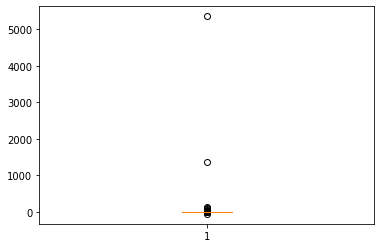

In [47]:
#displaying box plot example of outliers is some of the variables before performing outlier detection

plt.boxplot(final_iqr['BVPS'])

In [48]:
#iterating through every feature in the dataset and applying the outlier detection function to it

for column in final_iqr:
    final_iqr[column] = IQROutlierDetection(final_iqr[column])

In [49]:
#deleting records where anomalies where detected in one of the features

final_iqr = final_iqr.dropna()
len(final_iqr)

387

{'whiskers': [<matplotlib.lines.Line2D at 0x1769dbd9eb8>,
 'caps': [<matplotlib.lines.Line2D at 0x1769dbe6828>,
 'boxes': [<matplotlib.lines.Line2D at 0x1769dbd9d68>],
 'medians': [<matplotlib.lines.Line2D at 0x1769dbe6eb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1769dbe6f98>],
 'means': []}

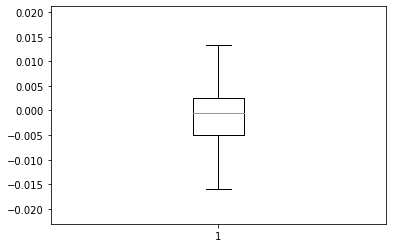

In [50]:
#displaying box plot example of outliers for the same variables as after performing outlier detection

plt.boxplot(final_iqr['DE'], sym = 'none')

In [51]:
#displaying box plot example of outliers for the same variables as after performing outlier detection

#plt.boxplot(final_iqr['ROE'], sym = 'none')

{'whiskers': [<matplotlib.lines.Line2D at 0x1769d685da0>,
 'caps': [<matplotlib.lines.Line2D at 0x1769d6a66a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1769d685320>],
 'medians': [<matplotlib.lines.Line2D at 0x1769d66d208>],
 'fliers': [<matplotlib.lines.Line2D at 0x1769d66d8d0>],
 'means': []}

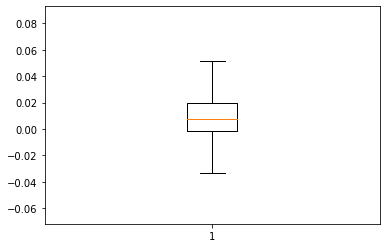

In [52]:
#displaying box plot example of outliers for the same variables as after performing outlier detection

plt.boxplot(final_iqr['BVPS'], sym='none')

Another dataframe will be created to store all removed records of data by the IQR outlier detection, and the z-score method will be applied to preserve as much data as possible.

In [695]:
ticker_list = final_iqr.index.unique()

In [696]:
final_zscore = final.copy()
del final_zscore['Class']

In [697]:
for ind in ticker_list:
    final_zscore = final_zscore.drop(ind)

In [698]:
len(final_zscore)

1833

## Z-Score Method

## Testing for Normality

taken from Adam Gaweda https://www.youtube.com/watch?v=12qn03Ml87E&t=376s

Using Shapiro-Wilk test for normality to decide on the threshold for identifying anomalies later with the z-score method.
If test is not significant (i.e. p-value above 0.05), then the data is normally distributed. Therefore, if the test is significant, (i.e. p-value below 0.05), then the data is not normally distributed.

In [699]:
def ShapiroTest(df_name):
    
    df = final[df_name]
    
    array = []
    
    for idx, value in df.items():
        array.append(value)
        
    array = np.array(array)
    
    W, p = stats.shapiro(array)
    
    if p < 0.05:
        print("Data is not normally distributed")
    else:
        print("Data is normally distributed")

In [700]:
for col in final.columns:
    ShapiroTest(col)

Data is not normally distributed
Data is not normally distributed
Data is not normally distributed
Data is not normally distributed
Data is not normally distributed
Data is not normally distributed
Data is not normally distributed
Data is not normally distributed
Data is not normally distributed
Data is not normally distributed
Data is not normally distributed
Data is not normally distributed
Data is not normally distributed
Data is not normally distributed
Data is not normally distributed
Data is not normally distributed
Data is not normally distributed
Data is not normally distributed
Data is not normally distributed
Data is not normally distributed
Data is not normally distributed
Data is not normally distributed


All features in dataset are not normally distributed, and therefore the threshold for identifying outliers under the z-score method will be set to 4 standards deviations above or below the mean value.

Z-Score formula for detecting and removing outliers is deleting any record that has a value above or below 4 times the standard deviation.

In [701]:
def ZScoreOutlierDetection(df_name):
    
    df = final[df_name]
    
    std = df.std()
    
    lower_threshold = std*-4
    upper_threshold = std*4
    
    df = pd.DataFrame(df)
    
    for index, row in df.iterrows():
        if (row > upper_threshold).all():
            df.drop(index, inplace=True)
        else:
            if (row < lower_threshold).all():
                df.drop(index, inplace = True)
    
    df = df.dropna()
    
    return df

In [702]:
for column in final_zscore:
    final_zscore[column] = ZScoreOutlierDetection(column)

In [703]:
final_zscore = final_zscore.dropna()

In [704]:
len(final_zscore)

1760

In [705]:
final_zscore.columns

Index(['OI', 'NI', 'NCFO', 'FCFPS', 'BVPS', 'DE', 'OPEX', 'EPDS', 'ASSETS',
       'LIAB', 'INVCAP', 'EBITDAM', 'SPS', 'PE', 'PS', 'PB', 'ROS', 'ROE',
       'ROA', 'ROIC', 'MARCAP'],
      dtype='object')

In [64]:
final_zscore['Class'] = final['Class'].copy()

In [65]:
#concat both dataframes together as the final dataframe

final_test = pd.concat([final_iqr, final_zscore], axis = 0)

In [718]:
len(final_test)

2079

# Feature Scaling

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
def FeatureScaling(df_column):
    
    feature = pd.DataFrame(df_column)
    
    ticker_list = feature.index.unique()
    
    scaling = MinMaxScaler(feature_range=(-1,1))
    
    df_matrix = feature.values.reshape(-1, 1)
    scaled_df = scaling.fit_transform(df_matrix)
    
    df = pd.DataFrame(scaled_df, index = ticker_list)
    
    return df

In [69]:
#applying feature scaling function to every column in the dataframe

for column in final_iqr:
    final_iqr[column] = FeatureScaling(final_iqr[column])

final_iqr['Class'] = final['Class'].copy()

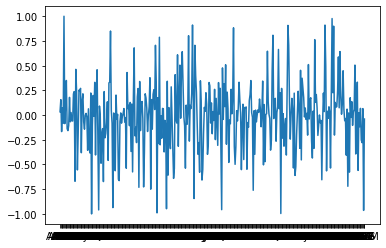

In [70]:
#visualizing an example of the range of data values for a feature after performing feature scaling to confirm its completion

plt.plot(final_iqr['DE'])

In [71]:
del final_test['Class']

In [72]:
for column in final_test:
    final_test[column] = FeatureScaling(final_test[column])

final_test['Class'] = final['Class'].copy()

# Relationship Analysis

No handles with labels found to put in legend.


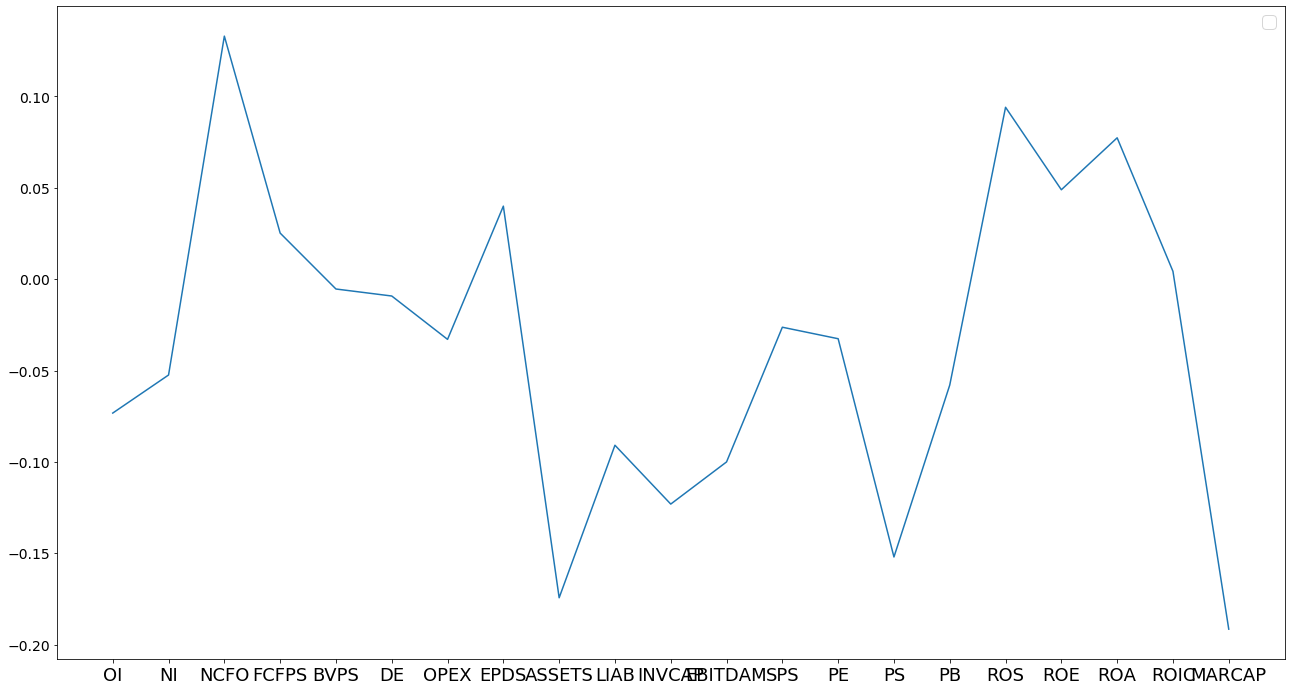

In [73]:
mean_scores = pd.DataFrame(final_iqr.mean(), columns = ['Mean Scores'])
mean_scores = mean_scores.drop(['Class'])

plt.figure(figsize = (22, 12))
plt.plot(mean_scores)
plt.legend(loc = 'best', fontsize = 'xx-large')
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 14)
plt.show()

# Descriptive Statistics

In [74]:
#final_iqr.describe().to_csv('descriptives.csv')

In [75]:
corr_matrix = final_iqr.corr()

In [76]:
corr_matrix

,OI,NI,NCFO,FCFPS,BVPS,DE,OPEX,EPDS,ASSETS,LIAB,...,EBITDAM,SPS,PE,PS,PB,ROS,ROE,ROA,ROIC,MARCAP
OI,1.000000,0.837093,0.287989,0.128510,0.091390,-0.137681,-0.318930,0.704567,0.013702,0.028876,...,0.434013,0.389841,-0.239507,0.032923,0.089676,0.233762,0.258987,0.213592,0.137333,0.107936
NI,0.837093,1.000000,0.212898,0.083887,0.146298,-0.177142,-0.269063,0.746621,0.041881,-0.025831,...,0.462902,0.350188,-0.319485,-0.002913,0.031602,0.226923,0.263925,0.229992,0.106421,0.094137
NCFO,0.287989,0.212898,1.000000,0.675508,0.043619,-0.028036,-0.059668,0.120761,0.011879,0.043346,...,0.149626,0.067772,-0.038867,0.005342,0.019326,0.079819,0.099196,0.062332,0.059457,0.035548
FCFPS,0.128510,0.083887,0.675508,1.000000,0.062206,-0.027041,0.021545,0.089355,0.070269,0.043539,...,0.138456,0.060693,-0.019582,-0.029326,0.013480,0.032371,0.052737,0.040288,0.056262,0.019573
BVPS,0.091390,0.146298,0.043619,0.062206,1.000000,-0.385294,0.022404,0.197131,0.335240,0.026919,...,0.160063,0.105298,-0.162341,0.011955,-0.137782,0.029433,-0.152925,-0.083182,-0.027506,0.245616
DE,-0.137681,-0.177142,-0.028036,-0.027041,-0.385294,1.000000,0.040526,-0.207752,0.100113,0.334989,...,-0.161237,0.041163,0.108880,-0.019252,0.081770,-0.063851,0.004313,-0.054003,-0.097802,-0.071302
OPEX,-0.318930,-0.269063,-0.059668,0.021545,0.022404,0.040526,1.000000,-0.161090,0.231857,0.221930,...,-0.148511,0.287481,0.040007,-0.060166,0.023370,-0.066508,-0.061364,-0.002271,0.047884,0.114986
EPDS,0.704567,0.746621,0.120761,0.089355,0.197131,-0.207752,-0.161090,1.000000,0.036689,-0.005836,...,0.593610,0.494185,-0.303543,-0.015524,0.073748,0.274281,0.304794,0.295442,0.179827,0.129648
ASSETS,0.013702,0.041881,0.011879,0.070269,0.335240,0.100113,0.231857,0.036689,1.000000,0.861150,...,0.073982,0.111859,-0.047982,-0.075439,-0.071190,0.030645,-0.032916,-0.042668,-0.071372,0.161226
LIAB,0.028876,-0.025831,0.043346,0.043539,0.026919,0.334989,0.221930,-0.005836,0.861150,1.000000,...,0.046452,0.155117,0.019031,-0.111461,-0.025295,0.056641,0.059877,-0.003195,-0.063471,0.017197


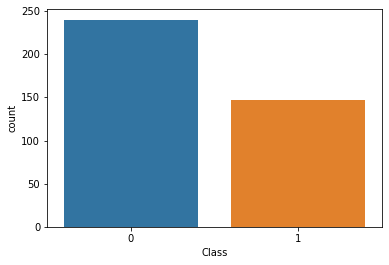

In [77]:
sns.countplot(x = 'Class', data = final_iqr)

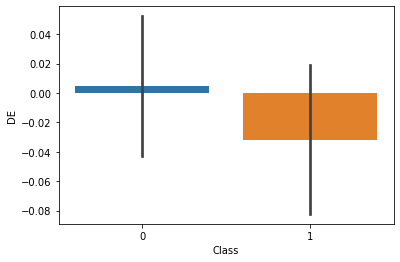

In [78]:
sns.barplot(x = 'Class', y = 'DE', data = final_iqr)

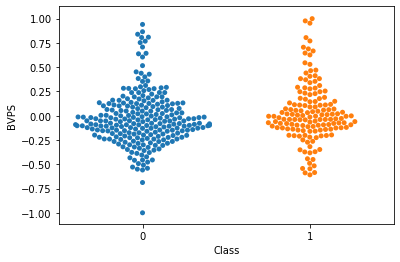

In [79]:
sns.swarmplot(x = 'Class', y = 'BVPS', data = final_iqr)

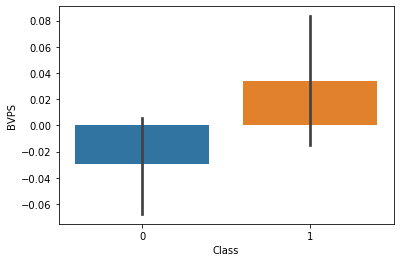

In [80]:
sns.barplot(x = 'Class', y = 'BVPS', data = final_iqr)

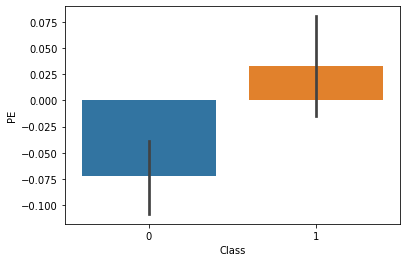

In [81]:
sns.barplot(x = 'Class', y = 'PE', data = final_iqr)

# Train/Test Split

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit 
import imblearn.under_sampling as under
from sklearn.utils import shuffle

In [399]:
final_X = final_iqr.copy()

del final_X['Class']

final_y = final_iqr['Class'].copy()

final_y.value_counts()

0    240
1    147
Name: Class, dtype: int64

In [436]:
zeroes = []
ones = []

for value in final_y:
    if value == '0':
        zeroes.append(value)
    elif value == '1':
        ones.append(value)

train_point = 0.7*len(ones)
test_point = train_point + (0.2*len(ones))
val_point = test_point + (0.1*len(ones))

train_point = int(train_point)
test_point = int(test_point)
val_point = int(val_point)

print("Point of extraction for training set is the first number of records from target dataframe:", train_point)
print("Point of extraction for training set is the second number of records from target dataframe:", test_point)
print("Point of extraction for training set is the third number of records from target dataframe:", val_point)

Point of extraction for training set is the first number of records from target dataframe: 102
Point of extraction for training set is the second number of records from target dataframe: 132
Point of extraction for training set is the third number of records from target dataframe: 146


In [401]:
#undersampling to get a better balance for dataset, target is a 50/50 balanced dataset
#since there are only 246 '1' classification labels, 200 '0' and 200 '1' classification labels only will be extracted

#manually taking random sample from dataset to get perfectly balanced training data


final_X = final_iqr.copy()

del final_X['Class']

final_y = final_iqr['Class'].copy()


#shuffling order of dataset to ensure that sample taken is random
final_X, final_y = shuffle(final_X, final_y)

y_df = pd.DataFrame(final_y).copy()
x_df = pd.DataFrame(final_X).copy()

#filtering dataframe to only get records where class label is '0' and another dataframe with class label of '1' only
zeroes = y_df[(y_df.Class == "0")]
ones = y_df[(y_df.Class == "1")]

train_set_y_ones = ones.iloc[:train_point]
train_set_y_zeroes = zeroes.iloc[:train_point]
train_set_y = pd.concat([train_set_y_ones, train_set_y_zeroes], axis=0)

test_set_y_ones = ones.iloc[train_point:test_point]
test_set_y_zeroes = zeroes.iloc[train_point:test_point]
test_set_y = pd.concat([test_set_y_ones, test_set_y_zeroes], axis=0)

val_set_y_ones = ones.iloc[test_point:val_point]
val_set_y_zeroes = zeroes.iloc[test_point:val_point]
val_set_y = pd.concat([val_set_y_ones, val_set_y_zeroes], axis=0)

train_set_ind = train_set_y.index.unique().tolist()
test_set_ind = test_set_y.index.unique().tolist()
val_set_ind = val_set_y.index.unique().tolist()

train_set_x = x_df.loc[train_set_ind]
test_set_x = x_df.loc[test_set_ind]
val_set_x = x_df.loc[val_set_ind]

train_set = pd.concat([train_set_x, train_set_y], axis=1)

test_set = pd.concat([test_set_x, test_set_y], axis=1)

val_set = pd.concat([val_set_x, val_set_y], axis=1)


X_train = train_set.copy()
del X_train['Class']
y_train = train_set['Class'].copy()

X_test = test_set.copy()
del X_test['Class']
y_test = test_set['Class'].copy()

X_val = val_set.copy()
del X_val['Class']
y_val = val_set['Class'].copy()

X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)
X_val, y_val = shuffle(X_val, y_val)

# Null Accuracy

In [402]:
y_test.value_counts()

0    30
1    30
Name: Class, dtype: int64

In [403]:
#calculate the percentage of zeroes from total
zeroes = (y_test.value_counts().iloc[0]/y_test.value_counts().sum())*100
zeroes

50.0

In [404]:
#calculate the percentage of ones from total
ones = 100 - ((y_test.value_counts().iloc[0]/y_test.value_counts().sum())*100)
ones

50.0

In [405]:
#calculating null accuracy, which in this case is 59.4%
print("Null Accuracy:", max(zeroes, ones))

Null Accuracy: 50.0


If model chose the max. output values and predicted all values to be that output value, the model will have a classification accuracy of 61.4%. The model has to have a higher classification accuracy to be considered efficient. In other words, this will be the baseline model accuracy.

# Building Logistic Regression Model for Comparison

In [413]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score, classification_report
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

In [490]:
logreg = LogisticRegression()
log_model = logreg.fit(X_train, y_train)

In [491]:
#classification accuracy on train set

y_pred = logreg.predict(X_train)
print("Trainset Accuracy:", metrics.accuracy_score(y_train, y_pred))

Trainset Accuracy: 0.6421568627450981


In [492]:
#testing model on test set

y_pred_class = logreg.predict(X_test)
print("Testset Accuracy:", metrics.accuracy_score(y_test, y_pred_class))

Testset Accuracy: 0.6666666666666666


## Hyperparameter Tuning Logistic Regression

In [417]:
#hyperparameter tuning for logistic regression model

penalties = ['l2', 'l1', 'elasticnet', 'none']
solvers = ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
max_iters = [100, 250, 500, 1000, 2500]
param_grid = dict(penalty = penalties, solver = solvers, max_iter = max_iters)

In [418]:
loggrid = GridSearchCV(logreg, param_grid = param_grid, cv = 5, verbose = 0)

best_loggrid = loggrid.fit(X_train, y_train)

print(best_loggrid.best_score_, best_loggrid.best_params_)

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    est

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estim

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 450, in _check_solver
    " got solver={}.".format(solver))
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimat

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 454, in _check_solver
    "penalty='none' is not supported for the liblinear solver"
ValueError: penalty='none' is not supported for the liblinear solver

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score

0.5540243902439025 {'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [419]:
pred_y = best_loggrid.predict(X_test)

target_names = ['Decline', 'Growth']
print(classification_report(y_test, pred_y, target_names=target_names))

              precision    recall  f1-score   support

     Decline       0.68      0.63      0.66        30
      Growth       0.66      0.70      0.68        30

    accuracy                           0.67        60
   macro avg       0.67      0.67      0.67        60
weighted avg       0.67      0.67      0.67        60



## Optimally Tuned Logisitc Regression Model

In [487]:
logreg = LogisticRegression(max_iter = 100, penalty = 'l2', solver = 'lbfgs')
log_model = logreg.fit(X_train, y_train)

In [488]:
#classification accuracy on train set

y_pred = logreg.predict(X_train)
print("Trainset Accuracy:", metrics.accuracy_score(y_train, y_pred))

Trainset Accuracy: 0.6421568627450981


In [535]:
#testing model on test set

y_pred_class = logreg.predict(X_test)
print("Testset Accuracy:", metrics.accuracy_score(y_test, y_pred_class))

Testset Accuracy: 0.6666666666666666


## Confusion Matrix (Logistic Regression)

Classification Rate: 66.66666666666666
Misclassification Rate: 33.33333333333333
Recall: 52.5
Specificity Rate: 63.33333333333333
False Negative Rate: 36.666666666666664
Precision Score: 65.625


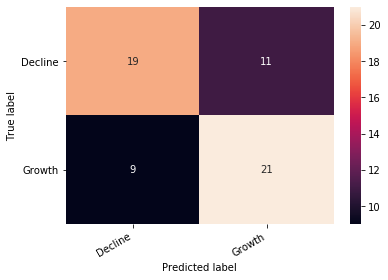

In [692]:
classes = ['Decline', 'Growth']

cm = metrics.confusion_matrix(y_test, y_pred_class)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label');

#calculating overall model accuracy

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

print(f"Classification Rate:",((TP + TN)/float(TP + TN + FP + FN))*100)
print(f"Misclassification Rate:", ((FP + FN)/float(TP + TN + FP + FN))*100)

#calculating sensitivity rate/true positive rate/recall (actual response value is 'Growth')
#i.e. when actuall value is 'Growth', how often is prediction correct?
print(f"Recall:", ((TP)/float(TP + TN))*100)

#calculating specificity rate
#i.e. how specific/selective the classifier is when prediction 'Growth' values?
print(f"Specificity Rate:", ((TN)/float(TN + FP))*100)

#calculating false positive rate
#i.e. when actual value is 'Decline', how often is the value incorrect?
print(f"False Negative Rate:", ((FP)/float(TN + FP))*100)

#calculating precision score
#i.e. how precise is the classifier when predicting 'Growth' instances?
print(f"Precision Score:", ((TP)/float(TP + FP))*100)

Guide:

Bottom-right: True Positive (TP): correctly predicted 'Growth' stocks

Upper-left: True Negative (TN): correctly predicted 'Decline' stocks

Upper-right: False Positive (FP): incorrectly predicted 'Growth' stocks (Type-1 Error)

Bottom-left: False Negative (FN): incorrectly predicted 'Decline' stocks (Type-2 Error

In [504]:
#calculating f-score

f1 = f1_score(y_test, y_pred_class, pos_label='1')
print("F1 Score is", f1*100)

F1 Score is 67.74193548387096


# Building the Neural Network (attempt 2)

taken from deeplizard YT link: https://www.youtube.com/watch?v=qFJeN9V1ZsI

In [719]:
#imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

from ann_visualizer.visualize import ann_viz
from graphviz import Source

import itertools

import matplotlib.pyplot as plt

In [425]:
#creating a numpy array to store numpy arrays of records for the features, which is the required format for the keras
#neural network model

X_train.astype(float)
y_train.astype(float)

feature_values = X_train.values.tolist()
label_values = y_train.values.tolist()


feature_records = []
label_records = []

for x in feature_values:
    feature_records.append(np.array(x))
    
for y in label_values:
    label_records.append(np.array(y))

feature_records = np.array(feature_records)
label_records = np.array(label_records).astype(int).astype(float).reshape(-1, 1)


#shuffling training dataset so as not to have a randomly generated validation split when it is performed later
#feature_records, label_records = shuffle(feature_records, label_records)

print(label_records.shape, feature_records.shape)
print(label_records.dtype)
print(feature_records.dtype)

(204, 1) (204, 21)
float64
float64


In [426]:
#repeating the same process for the test data for testing model on later

#X_test.astype(float)
#y_test.astype(float)

feature_values_test = X_test.values.tolist()
label_values_test = y_test.values.tolist()


feature_records_test = []
label_records_test = []

for x in feature_values_test:
    feature_records_test.append(np.array(x))
    
for y in label_values_test:
    label_records_test.append(np.array(y))

feature_records_test = np.array(feature_records_test)
label_records_test = np.array(label_records_test).astype(int).reshape(-1, 1)


#shuffling training dataset so as not to have a randomly generated validation split when it is performed later
#feature_records_test, label_records_test = shuffle(feature_records_test, label_records_test)

print(label_records_test.shape, feature_records_test.shape)
print(label_records_test.dtype)
print(feature_records_test.dtype)

(60, 1) (60, 21)
int32
float64


In [427]:
#repeating the same process for the validation data for cross validation

#X_test.astype(float)
#y_test.astype(float)

feature_values_val = X_val.values.tolist()
label_values_val = y_val.values.tolist()


feature_records_val = []
label_records_val = []

for x in feature_values_val:
    feature_records_val.append(np.array(x))
    
for y in label_values_val:
    label_records_val.append(np.array(y))

feature_records_val = np.array(feature_records_val)
label_records_val = np.array(label_records_val).astype(int).reshape(-1, 1)


#shuffling training dataset so as not to have a randomly generated validation split when it is performed later
#feature_records_val, label_records_val = shuffle(feature_records_val, label_records_val)

print(label_records_val.shape, feature_records_val.shape)
print(label_records_val.dtype)
print(feature_records_val.dtype)

(28, 1) (28, 21)
int32
float64


In [480]:
#sequential models are a linear stack of layers and dense means fully connectd layers
#tanh layer activation function will be used since the sign of the input values is important for the model to learn on
#cross entropy loss function will be used because output values are binary
#Adam optimizer will be used

model = Sequential([
    Dense(units = 16, input_shape = (21,), activation = 'elu', kernel_regularizer = tf.keras.regularizers.l1(0.01)), 
    Dense(units = 8, activation = 'elu', kernel_regularizer = tf.keras.regularizers.l1(0.01)),
    Dense(units = 4, activation = 'elu', kernel_regularizer = tf.keras.regularizers.l1(0.01)),
    Dense(units = 2, activation = 'softmax', activity_regularizer = tf.keras.regularizers.l1(0.01))
])

monitor = EarlyStopping(monitor='val_loss', patience = 20, 
                        min_delta = 0, verbose = 1, 
                        mode = 'auto', restore_best_weights=True)

model.compile(optimizer = Adam(learning_rate = 0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

model.summary()

Model: "sequential_5317"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22422 (Dense)          (None, 16)                352       
_________________________________________________________________
dense_22423 (Dense)          (None, 8)                 136       
_________________________________________________________________
dense_22424 (Dense)          (None, 4)                 36        
_________________________________________________________________
dense_22425 (Dense)          (None, 2)                 10        
Total params: 534
Trainable params: 534
Non-trainable params: 0
_________________________________________________________________


In [481]:
#model 1
mymodel = model.fit(feature_records, label_records, 
                    validation_data=(feature_records_val,label_records_val), batch_size = 10, epochs = 2000, 
                    shuffle = True, verbose = 2, callbacks = [monitor])

print(mymodel)

len(mymodel.history['loss'])

Epoch 1/2000
21/21 - 0s - loss: 1.9219 - accuracy: 0.4069 - val_loss: 1.8127 - val_accuracy: 0.6071
Epoch 2/2000
21/21 - 0s - loss: 1.9127 - accuracy: 0.4069 - val_loss: 1.8064 - val_accuracy: 0.6071
Epoch 3/2000
21/21 - 0s - loss: 1.9041 - accuracy: 0.4069 - val_loss: 1.7999 - val_accuracy: 0.6071
Epoch 4/2000
21/21 - 0s - loss: 1.8956 - accuracy: 0.4167 - val_loss: 1.7939 - val_accuracy: 0.5714
Epoch 5/2000
21/21 - 0s - loss: 1.8874 - accuracy: 0.4167 - val_loss: 1.7876 - val_accuracy: 0.5714
Epoch 6/2000
21/21 - 0s - loss: 1.8791 - accuracy: 0.4216 - val_loss: 1.7814 - val_accuracy: 0.5714
Epoch 7/2000
21/21 - 0s - loss: 1.8712 - accuracy: 0.4265 - val_loss: 1.7754 - val_accuracy: 0.5714
Epoch 8/2000
21/21 - 0s - loss: 1.8633 - accuracy: 0.4265 - val_loss: 1.7691 - val_accuracy: 0.5714
Epoch 9/2000
21/21 - 0s - loss: 1.8557 - accuracy: 0.4314 - val_loss: 1.7630 - val_accuracy: 0.5714
Epoch 10/2000
21/21 - 0s - loss: 1.8482 - accuracy: 0.4363 - val_loss: 1.7574 - val_accuracy: 0.5714

Epoch 83/2000
21/21 - 0s - loss: 1.4077 - accuracy: 0.6471 - val_loss: 1.3703 - val_accuracy: 0.6786
Epoch 84/2000
21/21 - 0s - loss: 1.4026 - accuracy: 0.6471 - val_loss: 1.3655 - val_accuracy: 0.6786
Epoch 85/2000
21/21 - 0s - loss: 1.3974 - accuracy: 0.6422 - val_loss: 1.3608 - val_accuracy: 0.6786
Epoch 86/2000
21/21 - 0s - loss: 1.3922 - accuracy: 0.6471 - val_loss: 1.3559 - val_accuracy: 0.6786
Epoch 87/2000
21/21 - 0s - loss: 1.3871 - accuracy: 0.6471 - val_loss: 1.3512 - val_accuracy: 0.6786
Epoch 88/2000
21/21 - 0s - loss: 1.3820 - accuracy: 0.6471 - val_loss: 1.3462 - val_accuracy: 0.6786
Epoch 89/2000
21/21 - 0s - loss: 1.3769 - accuracy: 0.6471 - val_loss: 1.3412 - val_accuracy: 0.6786
Epoch 90/2000
21/21 - 0s - loss: 1.3721 - accuracy: 0.6471 - val_loss: 1.3368 - val_accuracy: 0.6786
Epoch 91/2000
21/21 - 0s - loss: 1.3665 - accuracy: 0.6471 - val_loss: 1.3317 - val_accuracy: 0.6786
Epoch 92/2000
21/21 - 0s - loss: 1.3615 - accuracy: 0.6471 - val_loss: 1.3268 - val_accurac

Epoch 164/2000
21/21 - 0s - loss: 1.0531 - accuracy: 0.6324 - val_loss: 1.0390 - val_accuracy: 0.5357
Epoch 165/2000
21/21 - 0s - loss: 1.0497 - accuracy: 0.6373 - val_loss: 1.0357 - val_accuracy: 0.5357
Epoch 166/2000
21/21 - 0s - loss: 1.0463 - accuracy: 0.6324 - val_loss: 1.0325 - val_accuracy: 0.5357
Epoch 167/2000
21/21 - 0s - loss: 1.0428 - accuracy: 0.6324 - val_loss: 1.0294 - val_accuracy: 0.5357
Epoch 168/2000
21/21 - 0s - loss: 1.0394 - accuracy: 0.6373 - val_loss: 1.0262 - val_accuracy: 0.5357
Epoch 169/2000
21/21 - 0s - loss: 1.0360 - accuracy: 0.6373 - val_loss: 1.0230 - val_accuracy: 0.5357
Epoch 170/2000
21/21 - 0s - loss: 1.0327 - accuracy: 0.6373 - val_loss: 1.0199 - val_accuracy: 0.5357
Epoch 171/2000
21/21 - 0s - loss: 1.0293 - accuracy: 0.6373 - val_loss: 1.0168 - val_accuracy: 0.5357
Epoch 172/2000
21/21 - 0s - loss: 1.0261 - accuracy: 0.6324 - val_loss: 1.0137 - val_accuracy: 0.5357
Epoch 173/2000
21/21 - 0s - loss: 1.0227 - accuracy: 0.6275 - val_loss: 1.0106 - v

Epoch 245/2000
21/21 - 0s - loss: 0.8505 - accuracy: 0.6275 - val_loss: 0.8517 - val_accuracy: 0.5357
Epoch 246/2000
21/21 - 0s - loss: 0.8488 - accuracy: 0.6225 - val_loss: 0.8501 - val_accuracy: 0.5714
Epoch 247/2000
21/21 - 0s - loss: 0.8471 - accuracy: 0.6225 - val_loss: 0.8486 - val_accuracy: 0.5714
Epoch 248/2000
21/21 - 0s - loss: 0.8455 - accuracy: 0.6275 - val_loss: 0.8470 - val_accuracy: 0.5714
Epoch 249/2000
21/21 - 0s - loss: 0.8437 - accuracy: 0.6225 - val_loss: 0.8455 - val_accuracy: 0.5714
Epoch 250/2000
21/21 - 0s - loss: 0.8420 - accuracy: 0.6176 - val_loss: 0.8440 - val_accuracy: 0.5714
Epoch 251/2000
21/21 - 0s - loss: 0.8403 - accuracy: 0.6176 - val_loss: 0.8424 - val_accuracy: 0.6071
Epoch 252/2000
21/21 - 0s - loss: 0.8387 - accuracy: 0.6225 - val_loss: 0.8409 - val_accuracy: 0.6071
Epoch 253/2000
21/21 - 0s - loss: 0.8370 - accuracy: 0.6225 - val_loss: 0.8394 - val_accuracy: 0.6071
Epoch 254/2000
21/21 - 0s - loss: 0.8354 - accuracy: 0.6225 - val_loss: 0.8379 - v

Epoch 326/2000
21/21 - 0s - loss: 0.7543 - accuracy: 0.6422 - val_loss: 0.7639 - val_accuracy: 0.5357
Epoch 327/2000
21/21 - 0s - loss: 0.7538 - accuracy: 0.6373 - val_loss: 0.7634 - val_accuracy: 0.5714
Epoch 328/2000
21/21 - 0s - loss: 0.7532 - accuracy: 0.6422 - val_loss: 0.7630 - val_accuracy: 0.5714
Epoch 329/2000
21/21 - 0s - loss: 0.7528 - accuracy: 0.6471 - val_loss: 0.7626 - val_accuracy: 0.5357
Epoch 330/2000
21/21 - 0s - loss: 0.7523 - accuracy: 0.6373 - val_loss: 0.7622 - val_accuracy: 0.5714
Epoch 331/2000
21/21 - 0s - loss: 0.7518 - accuracy: 0.6471 - val_loss: 0.7617 - val_accuracy: 0.5714
Epoch 332/2000
21/21 - 0s - loss: 0.7513 - accuracy: 0.6422 - val_loss: 0.7613 - val_accuracy: 0.5714
Epoch 333/2000
21/21 - 0s - loss: 0.7509 - accuracy: 0.6422 - val_loss: 0.7610 - val_accuracy: 0.5357
Epoch 334/2000
21/21 - 0s - loss: 0.7505 - accuracy: 0.6422 - val_loss: 0.7606 - val_accuracy: 0.5714
Epoch 335/2000
21/21 - 0s - loss: 0.7501 - accuracy: 0.6520 - val_loss: 0.7603 - v

Epoch 407/2000
21/21 - 0s - loss: 0.7299 - accuracy: 0.6422 - val_loss: 0.7448 - val_accuracy: 0.4643
Epoch 408/2000
21/21 - 0s - loss: 0.7297 - accuracy: 0.6422 - val_loss: 0.7446 - val_accuracy: 0.4643
Epoch 409/2000
21/21 - 0s - loss: 0.7296 - accuracy: 0.6422 - val_loss: 0.7445 - val_accuracy: 0.4643
Epoch 410/2000
21/21 - 0s - loss: 0.7294 - accuracy: 0.6373 - val_loss: 0.7443 - val_accuracy: 0.4643
Epoch 411/2000
21/21 - 0s - loss: 0.7292 - accuracy: 0.6422 - val_loss: 0.7442 - val_accuracy: 0.4643
Epoch 412/2000
21/21 - 0s - loss: 0.7290 - accuracy: 0.6373 - val_loss: 0.7441 - val_accuracy: 0.4643
Epoch 413/2000
21/21 - 0s - loss: 0.7288 - accuracy: 0.6422 - val_loss: 0.7440 - val_accuracy: 0.4643
Epoch 414/2000
21/21 - 0s - loss: 0.7287 - accuracy: 0.6373 - val_loss: 0.7439 - val_accuracy: 0.4643
Epoch 415/2000
21/21 - 0s - loss: 0.7285 - accuracy: 0.6422 - val_loss: 0.7439 - val_accuracy: 0.4643
Epoch 416/2000
21/21 - 0s - loss: 0.7283 - accuracy: 0.6373 - val_loss: 0.7438 - v

Epoch 488/2000
21/21 - 0s - loss: 0.7183 - accuracy: 0.6176 - val_loss: 0.7395 - val_accuracy: 0.3929
Epoch 489/2000
21/21 - 0s - loss: 0.7181 - accuracy: 0.6225 - val_loss: 0.7393 - val_accuracy: 0.3929
Epoch 490/2000
21/21 - 0s - loss: 0.7179 - accuracy: 0.6127 - val_loss: 0.7394 - val_accuracy: 0.3929
Epoch 491/2000
21/21 - 0s - loss: 0.7177 - accuracy: 0.6127 - val_loss: 0.7393 - val_accuracy: 0.3929
Epoch 492/2000
21/21 - 0s - loss: 0.7176 - accuracy: 0.6176 - val_loss: 0.7393 - val_accuracy: 0.3929
Epoch 493/2000
21/21 - 0s - loss: 0.7175 - accuracy: 0.6275 - val_loss: 0.7392 - val_accuracy: 0.5000
Epoch 494/2000
21/21 - 0s - loss: 0.7174 - accuracy: 0.6225 - val_loss: 0.7392 - val_accuracy: 0.3929
Epoch 495/2000
21/21 - 0s - loss: 0.7175 - accuracy: 0.6176 - val_loss: 0.7391 - val_accuracy: 0.3929
Epoch 496/2000
21/21 - 0s - loss: 0.7170 - accuracy: 0.6127 - val_loss: 0.7390 - val_accuracy: 0.3929
Epoch 497/2000
21/21 - 0s - loss: 0.7169 - accuracy: 0.6127 - val_loss: 0.7391 - v

Epoch 569/2000
21/21 - 0s - loss: 0.7065 - accuracy: 0.6225 - val_loss: 0.7370 - val_accuracy: 0.5000
Epoch 570/2000
21/21 - 0s - loss: 0.7063 - accuracy: 0.6176 - val_loss: 0.7370 - val_accuracy: 0.5000
Epoch 571/2000
21/21 - 0s - loss: 0.7062 - accuracy: 0.6225 - val_loss: 0.7369 - val_accuracy: 0.5000
Epoch 572/2000
21/21 - 0s - loss: 0.7059 - accuracy: 0.6225 - val_loss: 0.7367 - val_accuracy: 0.5000
Epoch 573/2000
21/21 - 0s - loss: 0.7058 - accuracy: 0.6225 - val_loss: 0.7367 - val_accuracy: 0.5000
Epoch 574/2000
21/21 - 0s - loss: 0.7057 - accuracy: 0.6225 - val_loss: 0.7365 - val_accuracy: 0.5000
Epoch 575/2000
21/21 - 0s - loss: 0.7055 - accuracy: 0.6225 - val_loss: 0.7364 - val_accuracy: 0.5000
Epoch 576/2000
21/21 - 0s - loss: 0.7053 - accuracy: 0.6225 - val_loss: 0.7364 - val_accuracy: 0.5000
Epoch 577/2000
21/21 - 0s - loss: 0.7051 - accuracy: 0.6225 - val_loss: 0.7364 - val_accuracy: 0.5000
Epoch 578/2000
21/21 - 0s - loss: 0.7049 - accuracy: 0.6225 - val_loss: 0.7362 - v

604

In [482]:
#testing on test set

predictions = model.predict(feature_records_test, batch_size = 10, verbose = 0)

rounded_predictions = np.argmax(predictions, axis = -1)

target_names = ['Decline', 'Growth']
print(classification_report(label_records_test, rounded_predictions, target_names=target_names))

              precision    recall  f1-score   support

     Decline       0.61      0.67      0.63        30
      Growth       0.63      0.57      0.60        30

    accuracy                           0.62        60
   macro avg       0.62      0.62      0.62        60
weighted avg       0.62      0.62      0.62        60



## Hyperparameter Tuning

In [432]:
#NN MODEL 2

def NNmodel(layers, activation):
    
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i == 0:
            model.add(Dense(nodes, input_dim  = feature_records.shape[1]))
            model.add(Activation(activation))
            model.add(Dense(nodes))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
    model.add(Dense(units = 2, activation = 'softmax'))
    
    monitor = EarlyStopping(monitor='val_loss', patience = 20, 
                        min_delta = 0, verbose = 1, 
                        mode = 'auto', restore_best_weights=True)

    model.compile(optimizer = Adam(learning_rate = 0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])
    
    return model

NNmodel = KerasClassifier(build_fn=NNmodel, verbose = 0)

In [433]:
layers = [(16, 8), (32, 16, 8), (32, 16, 8, 4), (16, 8, 4), (8, 4, 2), (8, 4)]
activations = ['sigmoid', 'relu', 'elu']
param_grid = dict(layers = layers, activation = activations, batch_size = [5, 10, 20, 30])

In [434]:
nn_grid = GridSearchCV(estimator = NNmodel, param_grid = param_grid, cv = 5)

best_nngrid = nn_grid.fit(feature_records, label_records)

pred_y_grid = best_nngrid.predict(feature_records_test)

In [435]:
print(best_nngrid.best_score_, best_nngrid.best_params_)

0.5592682957649231 {'activation': 'elu', 'batch_size': 30, 'layers': (8, 4, 2)}


## Optimally Tuned Neural Network

In [721]:
#sequential models are a linear stack of layers and dense means fully connectd layers
#tanh layer activation function will be used since the sign of the input values is important for the model to learn on
#cross entropy loss function will be used because output values are binary
#Adam optimizer will be used

model = Sequential([
    Dense(units = 8, input_shape = (21,), activation = 'elu', kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    Dense(units = 4, activation = 'elu', kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    Dense(units = 2, activation = 'softmax')
])

monitor = EarlyStopping(monitor='val_loss', patience = 20, 
                        min_delta = 0, verbose = 1, 
                        mode = 'auto', restore_best_weights=True)

model.compile(optimizer = Adam(learning_rate = 0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

model.summary()

Model: "sequential_5319"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22429 (Dense)          (None, 8)                 176       
_________________________________________________________________
dense_22430 (Dense)          (None, 4)                 36        
_________________________________________________________________
dense_22431 (Dense)          (None, 2)                 10        
Total params: 222
Trainable params: 222
Non-trainable params: 0
_________________________________________________________________


In [723]:
#visualizing neural network model

ann_viz(model, title = 'Neural Network for EWM & ORG Datasets')

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'network.gv'], make sure the Graphviz executables are on your systems' PATH

In [632]:
#model 1
mymodel = model.fit(feature_records, label_records, 
                    validation_data=(feature_records_val,label_records_val), batch_size =30, epochs = 2000, 
                    shuffle = True, verbose = 2, callbacks = [monitor])

print(mymodel)

len(mymodel.history['loss'])

Epoch 1/2000
7/7 - 1s - loss: 0.9007 - accuracy: 0.5735 - val_loss: 0.9549 - val_accuracy: 0.5000
Epoch 2/2000
7/7 - 0s - loss: 0.8997 - accuracy: 0.5735 - val_loss: 0.9533 - val_accuracy: 0.4643
Epoch 3/2000
7/7 - 0s - loss: 0.8987 - accuracy: 0.5735 - val_loss: 0.9517 - val_accuracy: 0.4643
Epoch 4/2000
7/7 - 0s - loss: 0.8977 - accuracy: 0.5735 - val_loss: 0.9502 - val_accuracy: 0.4643
Epoch 5/2000
7/7 - 0s - loss: 0.8967 - accuracy: 0.5735 - val_loss: 0.9487 - val_accuracy: 0.4643
Epoch 6/2000
7/7 - 0s - loss: 0.8957 - accuracy: 0.5735 - val_loss: 0.9472 - val_accuracy: 0.4643
Epoch 7/2000
7/7 - 0s - loss: 0.8948 - accuracy: 0.5686 - val_loss: 0.9457 - val_accuracy: 0.4643
Epoch 8/2000
7/7 - 0s - loss: 0.8939 - accuracy: 0.5686 - val_loss: 0.9442 - val_accuracy: 0.4643
Epoch 9/2000
7/7 - 0s - loss: 0.8929 - accuracy: 0.5686 - val_loss: 0.9428 - val_accuracy: 0.4643
Epoch 10/2000
7/7 - 0s - loss: 0.8920 - accuracy: 0.5686 - val_loss: 0.9413 - val_accuracy: 0.4643
Epoch 11/2000
7/7 -

Epoch 84/2000
7/7 - 0s - loss: 0.8371 - accuracy: 0.5784 - val_loss: 0.8597 - val_accuracy: 0.5357
Epoch 85/2000
7/7 - 0s - loss: 0.8365 - accuracy: 0.5784 - val_loss: 0.8589 - val_accuracy: 0.5357
Epoch 86/2000
7/7 - 0s - loss: 0.8359 - accuracy: 0.5784 - val_loss: 0.8581 - val_accuracy: 0.5357
Epoch 87/2000
7/7 - 0s - loss: 0.8354 - accuracy: 0.5784 - val_loss: 0.8572 - val_accuracy: 0.5357
Epoch 88/2000
7/7 - 0s - loss: 0.8348 - accuracy: 0.5784 - val_loss: 0.8564 - val_accuracy: 0.5357
Epoch 89/2000
7/7 - 0s - loss: 0.8342 - accuracy: 0.5784 - val_loss: 0.8557 - val_accuracy: 0.5357
Epoch 90/2000
7/7 - 0s - loss: 0.8337 - accuracy: 0.5784 - val_loss: 0.8548 - val_accuracy: 0.5357
Epoch 91/2000
7/7 - 0s - loss: 0.8331 - accuracy: 0.5784 - val_loss: 0.8540 - val_accuracy: 0.5357
Epoch 92/2000
7/7 - 0s - loss: 0.8325 - accuracy: 0.5784 - val_loss: 0.8532 - val_accuracy: 0.5357
Epoch 93/2000
7/7 - 0s - loss: 0.8320 - accuracy: 0.5833 - val_loss: 0.8525 - val_accuracy: 0.5357
Epoch 94/2

Epoch 166/2000
7/7 - 0s - loss: 0.7970 - accuracy: 0.6324 - val_loss: 0.8062 - val_accuracy: 0.5000
Epoch 167/2000
7/7 - 0s - loss: 0.7966 - accuracy: 0.6324 - val_loss: 0.8056 - val_accuracy: 0.5357
Epoch 168/2000
7/7 - 0s - loss: 0.7962 - accuracy: 0.6324 - val_loss: 0.8051 - val_accuracy: 0.5357
Epoch 169/2000
7/7 - 0s - loss: 0.7958 - accuracy: 0.6373 - val_loss: 0.8046 - val_accuracy: 0.5357
Epoch 170/2000
7/7 - 0s - loss: 0.7954 - accuracy: 0.6373 - val_loss: 0.8041 - val_accuracy: 0.5357
Epoch 171/2000
7/7 - 0s - loss: 0.7949 - accuracy: 0.6373 - val_loss: 0.8036 - val_accuracy: 0.5357
Epoch 172/2000
7/7 - 0s - loss: 0.7945 - accuracy: 0.6373 - val_loss: 0.8031 - val_accuracy: 0.5357
Epoch 173/2000
7/7 - 0s - loss: 0.7942 - accuracy: 0.6373 - val_loss: 0.8026 - val_accuracy: 0.5357
Epoch 174/2000
7/7 - 0s - loss: 0.7937 - accuracy: 0.6373 - val_loss: 0.8021 - val_accuracy: 0.5357
Epoch 175/2000
7/7 - 0s - loss: 0.7933 - accuracy: 0.6373 - val_loss: 0.8016 - val_accuracy: 0.5357


Epoch 248/2000
7/7 - 0s - loss: 0.7672 - accuracy: 0.6422 - val_loss: 0.7708 - val_accuracy: 0.6786
Epoch 249/2000
7/7 - 0s - loss: 0.7668 - accuracy: 0.6422 - val_loss: 0.7705 - val_accuracy: 0.6786
Epoch 250/2000
7/7 - 0s - loss: 0.7665 - accuracy: 0.6422 - val_loss: 0.7702 - val_accuracy: 0.6786
Epoch 251/2000
7/7 - 0s - loss: 0.7662 - accuracy: 0.6422 - val_loss: 0.7698 - val_accuracy: 0.6786
Epoch 252/2000
7/7 - 0s - loss: 0.7659 - accuracy: 0.6422 - val_loss: 0.7695 - val_accuracy: 0.6786
Epoch 253/2000
7/7 - 0s - loss: 0.7656 - accuracy: 0.6422 - val_loss: 0.7691 - val_accuracy: 0.6786
Epoch 254/2000
7/7 - 0s - loss: 0.7652 - accuracy: 0.6471 - val_loss: 0.7687 - val_accuracy: 0.6786
Epoch 255/2000
7/7 - 0s - loss: 0.7649 - accuracy: 0.6471 - val_loss: 0.7685 - val_accuracy: 0.6786
Epoch 256/2000
7/7 - 0s - loss: 0.7646 - accuracy: 0.6471 - val_loss: 0.7681 - val_accuracy: 0.6786
Epoch 257/2000
7/7 - 0s - loss: 0.7643 - accuracy: 0.6422 - val_loss: 0.7678 - val_accuracy: 0.6786


Epoch 330/2000
7/7 - 0s - loss: 0.7435 - accuracy: 0.6569 - val_loss: 0.7462 - val_accuracy: 0.7143
Epoch 331/2000
7/7 - 0s - loss: 0.7432 - accuracy: 0.6569 - val_loss: 0.7460 - val_accuracy: 0.6786
Epoch 332/2000
7/7 - 0s - loss: 0.7430 - accuracy: 0.6569 - val_loss: 0.7457 - val_accuracy: 0.6786
Epoch 333/2000
7/7 - 0s - loss: 0.7427 - accuracy: 0.6569 - val_loss: 0.7455 - val_accuracy: 0.6786
Epoch 334/2000
7/7 - 0s - loss: 0.7424 - accuracy: 0.6569 - val_loss: 0.7453 - val_accuracy: 0.6786
Epoch 335/2000
7/7 - 0s - loss: 0.7422 - accuracy: 0.6520 - val_loss: 0.7450 - val_accuracy: 0.6786
Epoch 336/2000
7/7 - 0s - loss: 0.7419 - accuracy: 0.6520 - val_loss: 0.7447 - val_accuracy: 0.6786
Epoch 337/2000
7/7 - 0s - loss: 0.7417 - accuracy: 0.6520 - val_loss: 0.7444 - val_accuracy: 0.6786
Epoch 338/2000
7/7 - 0s - loss: 0.7414 - accuracy: 0.6520 - val_loss: 0.7442 - val_accuracy: 0.6786
Epoch 339/2000
7/7 - 0s - loss: 0.7412 - accuracy: 0.6520 - val_loss: 0.7439 - val_accuracy: 0.6786


Epoch 412/2000
7/7 - 0s - loss: 0.7243 - accuracy: 0.6422 - val_loss: 0.7294 - val_accuracy: 0.6786
Epoch 413/2000
7/7 - 0s - loss: 0.7240 - accuracy: 0.6422 - val_loss: 0.7292 - val_accuracy: 0.6786
Epoch 414/2000
7/7 - 0s - loss: 0.7238 - accuracy: 0.6373 - val_loss: 0.7291 - val_accuracy: 0.6786
Epoch 415/2000
7/7 - 0s - loss: 0.7236 - accuracy: 0.6373 - val_loss: 0.7289 - val_accuracy: 0.6786
Epoch 416/2000
7/7 - 0s - loss: 0.7234 - accuracy: 0.6422 - val_loss: 0.7287 - val_accuracy: 0.6786
Epoch 417/2000
7/7 - 0s - loss: 0.7232 - accuracy: 0.6422 - val_loss: 0.7285 - val_accuracy: 0.6786
Epoch 418/2000
7/7 - 0s - loss: 0.7230 - accuracy: 0.6422 - val_loss: 0.7283 - val_accuracy: 0.6786
Epoch 419/2000
7/7 - 0s - loss: 0.7228 - accuracy: 0.6422 - val_loss: 0.7283 - val_accuracy: 0.6786
Epoch 420/2000
7/7 - 0s - loss: 0.7225 - accuracy: 0.6422 - val_loss: 0.7281 - val_accuracy: 0.6786
Epoch 421/2000
7/7 - 0s - loss: 0.7223 - accuracy: 0.6422 - val_loss: 0.7279 - val_accuracy: 0.6786


Epoch 494/2000
7/7 - 0s - loss: 0.7084 - accuracy: 0.6471 - val_loss: 0.7184 - val_accuracy: 0.6429
Epoch 495/2000
7/7 - 0s - loss: 0.7082 - accuracy: 0.6520 - val_loss: 0.7183 - val_accuracy: 0.6429
Epoch 496/2000
7/7 - 0s - loss: 0.7081 - accuracy: 0.6520 - val_loss: 0.7181 - val_accuracy: 0.6429
Epoch 497/2000
7/7 - 0s - loss: 0.7079 - accuracy: 0.6520 - val_loss: 0.7180 - val_accuracy: 0.6429
Epoch 498/2000
7/7 - 0s - loss: 0.7077 - accuracy: 0.6520 - val_loss: 0.7178 - val_accuracy: 0.6429
Epoch 499/2000
7/7 - 0s - loss: 0.7076 - accuracy: 0.6520 - val_loss: 0.7179 - val_accuracy: 0.6429
Epoch 500/2000
7/7 - 0s - loss: 0.7074 - accuracy: 0.6520 - val_loss: 0.7177 - val_accuracy: 0.6429
Epoch 501/2000
7/7 - 0s - loss: 0.7072 - accuracy: 0.6569 - val_loss: 0.7177 - val_accuracy: 0.6429
Epoch 502/2000
7/7 - 0s - loss: 0.7070 - accuracy: 0.6569 - val_loss: 0.7176 - val_accuracy: 0.6429
Epoch 503/2000
7/7 - 0s - loss: 0.7069 - accuracy: 0.6618 - val_loss: 0.7174 - val_accuracy: 0.6429


Epoch 576/2000
7/7 - 0s - loss: 0.6955 - accuracy: 0.6716 - val_loss: 0.7116 - val_accuracy: 0.6429
Epoch 577/2000
7/7 - 0s - loss: 0.6953 - accuracy: 0.6716 - val_loss: 0.7117 - val_accuracy: 0.6429
Epoch 578/2000
7/7 - 0s - loss: 0.6952 - accuracy: 0.6716 - val_loss: 0.7115 - val_accuracy: 0.6429
Epoch 579/2000
7/7 - 0s - loss: 0.6950 - accuracy: 0.6716 - val_loss: 0.7115 - val_accuracy: 0.6429
Epoch 580/2000
7/7 - 0s - loss: 0.6949 - accuracy: 0.6716 - val_loss: 0.7115 - val_accuracy: 0.6429
Epoch 581/2000
7/7 - 0s - loss: 0.6947 - accuracy: 0.6716 - val_loss: 0.7114 - val_accuracy: 0.6429
Epoch 582/2000
7/7 - 0s - loss: 0.6946 - accuracy: 0.6716 - val_loss: 0.7114 - val_accuracy: 0.6429
Epoch 583/2000
7/7 - 0s - loss: 0.6945 - accuracy: 0.6716 - val_loss: 0.7112 - val_accuracy: 0.6429
Epoch 584/2000
7/7 - 0s - loss: 0.6943 - accuracy: 0.6716 - val_loss: 0.7111 - val_accuracy: 0.6429
Epoch 585/2000
7/7 - 0s - loss: 0.6942 - accuracy: 0.6716 - val_loss: 0.7110 - val_accuracy: 0.6429


Epoch 658/2000
7/7 - 0s - loss: 0.6850 - accuracy: 0.6814 - val_loss: 0.7082 - val_accuracy: 0.6071
Epoch 659/2000
7/7 - 0s - loss: 0.6848 - accuracy: 0.6814 - val_loss: 0.7082 - val_accuracy: 0.6071
Epoch 660/2000
7/7 - 0s - loss: 0.6847 - accuracy: 0.6765 - val_loss: 0.7082 - val_accuracy: 0.6071
Epoch 661/2000
7/7 - 0s - loss: 0.6846 - accuracy: 0.6765 - val_loss: 0.7082 - val_accuracy: 0.6071
Epoch 662/2000
7/7 - 0s - loss: 0.6845 - accuracy: 0.6765 - val_loss: 0.7081 - val_accuracy: 0.6071
Epoch 663/2000
7/7 - 0s - loss: 0.6844 - accuracy: 0.6765 - val_loss: 0.7081 - val_accuracy: 0.6071
Epoch 664/2000
7/7 - 0s - loss: 0.6843 - accuracy: 0.6765 - val_loss: 0.7081 - val_accuracy: 0.5714
Epoch 665/2000
7/7 - 0s - loss: 0.6842 - accuracy: 0.6765 - val_loss: 0.7081 - val_accuracy: 0.5714
Epoch 666/2000
7/7 - 0s - loss: 0.6841 - accuracy: 0.6765 - val_loss: 0.7079 - val_accuracy: 0.5714
Epoch 667/2000
7/7 - 0s - loss: 0.6839 - accuracy: 0.6765 - val_loss: 0.7079 - val_accuracy: 0.5714


Epoch 740/2000
7/7 - 0s - loss: 0.6764 - accuracy: 0.6765 - val_loss: 0.7064 - val_accuracy: 0.5714
Epoch 741/2000
7/7 - 0s - loss: 0.6763 - accuracy: 0.6765 - val_loss: 0.7066 - val_accuracy: 0.5714
Epoch 742/2000
7/7 - 0s - loss: 0.6763 - accuracy: 0.6765 - val_loss: 0.7065 - val_accuracy: 0.5714
Epoch 743/2000
7/7 - 0s - loss: 0.6762 - accuracy: 0.6765 - val_loss: 0.7065 - val_accuracy: 0.5714
Epoch 744/2000
7/7 - 0s - loss: 0.6761 - accuracy: 0.6765 - val_loss: 0.7065 - val_accuracy: 0.5714
Epoch 745/2000
7/7 - 0s - loss: 0.6760 - accuracy: 0.6765 - val_loss: 0.7065 - val_accuracy: 0.5714
Epoch 746/2000
7/7 - 0s - loss: 0.6759 - accuracy: 0.6765 - val_loss: 0.7066 - val_accuracy: 0.5714
Epoch 747/2000
7/7 - 0s - loss: 0.6758 - accuracy: 0.6765 - val_loss: 0.7065 - val_accuracy: 0.5714
Epoch 748/2000
7/7 - 0s - loss: 0.6757 - accuracy: 0.6765 - val_loss: 0.7065 - val_accuracy: 0.5714
Epoch 749/2000
7/7 - 0s - loss: 0.6756 - accuracy: 0.6765 - val_loss: 0.7065 - val_accuracy: 0.5714


760

Classification Rate: 73.33333333333333
Misclassification Rate: 26.666666666666668
Recall: 50.0
Specificity Rate: 73.33333333333333
False Negative Rate: 26.666666666666668
Precision Score: 73.33333333333333


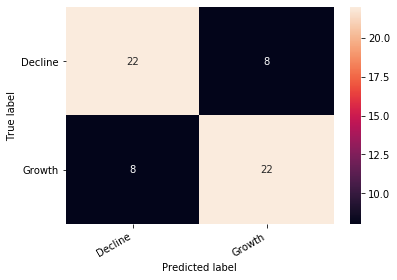

In [633]:
#testing by making predictions on test data

predictions = model.predict(feature_records_test, batch_size = 5, verbose = 0)

rounded_predictions = np.argmax(predictions, axis = -1)

#create confusion matrix to visualize model classification accuracy on the test data
classes = ['Decline', 'Growth']

cm = confusion_matrix(y_true = label_records_test, y_pred = rounded_predictions)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label');

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

print(f"Classification Rate:",((TP + TN)/float(TP + TN + FP + FN))*100)
print(f"Misclassification Rate:", ((FP + FN)/float(TP + TN + FP + FN))*100)

#calculating sensitivity rate/true positive rate/recall (actual response value is 'Growth')
#i.e. when actuall value is 'Growth', how often is prediction correct?
print(f"Recall:", ((TP)/float(TP + TN))*100)

#calculating specificity rate
#i.e. how specific/selective the classifier is when prediction 'Growth' values?
print(f"Specificity Rate:", ((TN)/float(TN + FP))*100)

#calculating false positive rate
#i.e. when actual value is 'Decline', how often is the value incorrect?
print(f"False Negative Rate:", ((FP)/float(TN + FP))*100)

#calculating precision score
#i.e. how precise is the classifier when predicting 'Growth' instances?
print(f"Precision Score:", ((TP)/float(TP + FP))*100)

Guide:

Bottom-right: True Positive (TP): correctly predicted 'Growth' stocks

Upper-left: True Negative (TN): correctly predicted 'Decline' stocks

Upper-right: False Positive (FP): incorrectly predicted 'Growth' stocks (Type-1 Error)

Bottom-left: False Negative (FN): incorrectly predicted 'Decline' stocks (Type-2 Error

In [675]:
#calculating f-score

f1 = f1_score(label_records_test, rounded_predictions)
print("F1 Score is", f1*100)

F1 Score is 73.33333333333333


In [679]:
#AUC Score and ROC Curve for both models

lr_probs = logreg.predict_proba(X_test)
nn_probs = model.predict_proba(feature_records_test)

In [688]:
class_one_prob_nn = []

for zeroes, ones in nn_probs:
    class_one_prob_nn.append(ones)
    
class_one_prob_lr = []

for zeroes, ones in lr_probs:
    class_one_prob_lr.append(ones)

In [689]:
#calculating roc score

lr_roc = roc_auc_score(y_test, class_one_prob_lr)

nn_roc = roc_auc_score(label_records_test, class_one_prob_nn)

print("Neural Network AUROC:", nn_roc*100, "Logistic Regression AUROC:", lr_roc*100)

Neural Network AUROC: 77.55555555555557 Logistic Regression AUROC: 76.66666666666667


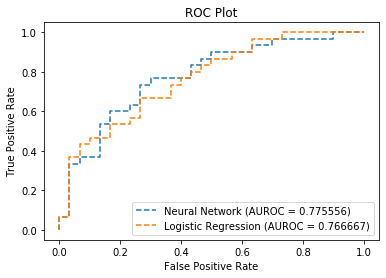

In [693]:
nn_fpr, nn_tpr, _ = roc_curve(label_records_test, class_one_prob_nn)
lg_fpr, lg_tpr, _ = roc_curve(y_true, class_one_prob_lr)

plt.plot(nn_fpr, nn_tpr, linestyle = '--', label = 'Neural Network (AUROC = %f)' % nn_roc)
plt.plot(lg_fpr, lg_tpr, linestyle = '--', label = 'Logistic Regression (AUROC = %f)' % lr_roc)


plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [694]:
#creating copies of needed elements for roc curve for neural network ewm method to export to other python sheet with alt.
#model for creating ROC plot between both NN models

label_records_test_ewm = label_records_test.copy()
rounded_predictions_ewm = class_one_prob_nn.copy()


np.savetxt('labelrecords.csv', label_records_test_ewm, delimiter=',')
np.savetxt('classoneprobnn.csv', rounded_predictions_ewm, delimiter=',')

## Input Sensitivity Analysis

In [640]:
import shap

In [641]:
shap.initjs()

In [642]:
explainer = shap.DeepExplainer(model, feature_records)

In [643]:
shap_values = explainer.shap_values(feature_records_test)

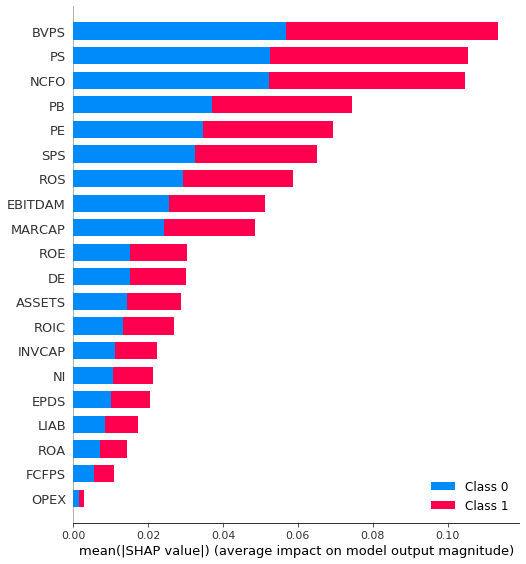

In [644]:
feature_names = X_test.columns

feature_names = np.array(feature_names)

shap.summary_plot(shap_values, feature_records_test, feature_names = feature_names)

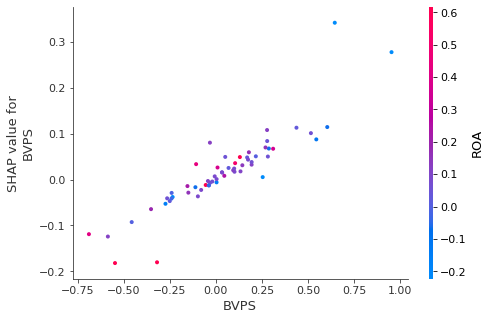

In [664]:
#BVPS dependence plot for class label 1

shap.dependence_plot("BVPS", shap_values[1], feature_records_test, feature_names = feature_names)

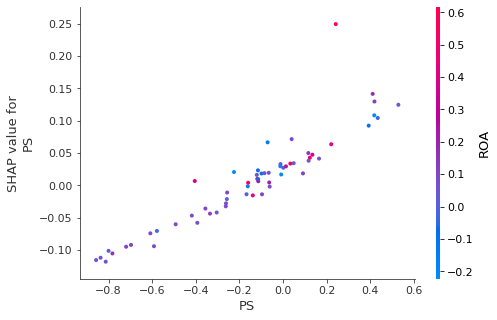

In [646]:
#PS dependence plot

shap.dependence_plot("PS", shap_values[1], feature_records_test, feature_names = feature_names)

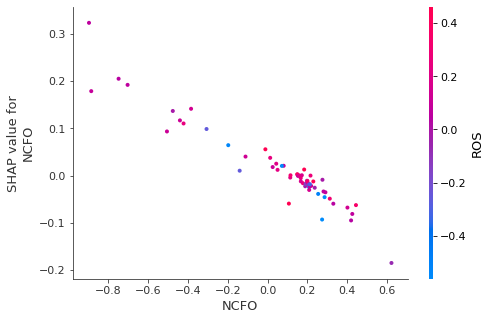

In [647]:
#NCFO dependence plot

shap.dependence_plot("NCFO", shap_values[1], feature_records_test, feature_names = feature_names)

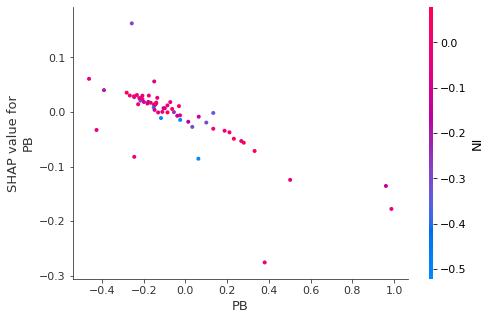

In [665]:


#PB dependence plot

shap.dependence_plot("PB", shap_values[1], feature_records_test, feature_names = feature_names)

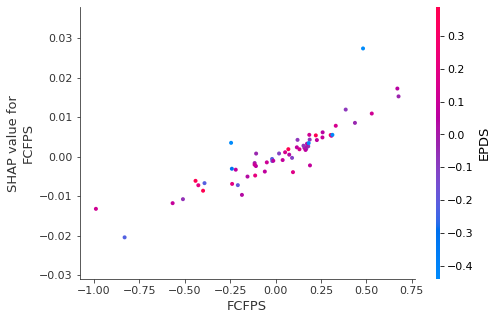

In [661]:
#bottom 3

#FCFPS dependence plot

shap.dependence_plot("FCFPS", shap_values[1], feature_records_test, feature_names = feature_names)

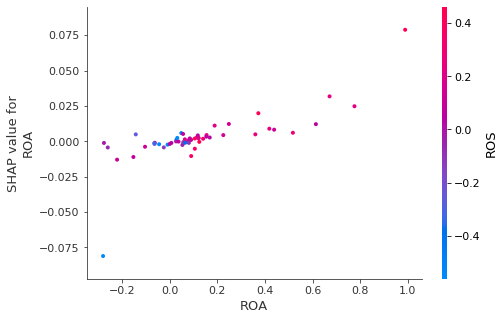

In [663]:
#ROA dependence plot

shap.dependence_plot("ROA", shap_values[1], feature_records_test, feature_names = feature_names)

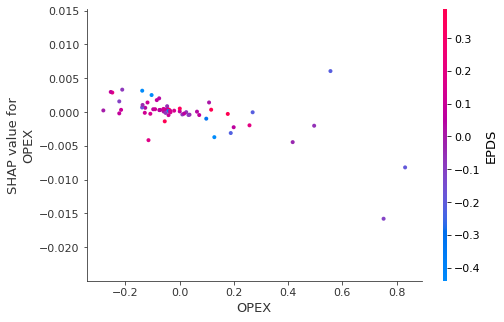

In [662]:
#bottom 3

#OPEX dependence plot

shap.dependence_plot("OPEX", shap_values[1], feature_records_test, feature_names = feature_names)

## Saving Neural Network Model

In [652]:
#saving and loading model for future use if required

import os.path
from tensorflow.keras.models import load_model

#if os.path.isfile('C:\\Users\\Selim\\Desktop\\Masters\\Final Project\\Datasets\\dissertationNN.h5') is False:
model.save('C:\\Users\\Selim\\Desktop\\Masters\\Final Project\\Datasets\\dissertationNN.h5')

In [653]:
#loading model
NN_model = load_model('C:\\Users\\Selim\\Desktop\\Masters\\Final Project\\Datasets\\dissertationNN.h5')

In [654]:
NN_model.summary()

Model: "sequential_5318"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22426 (Dense)          (None, 8)                 176       
_________________________________________________________________
dense_22427 (Dense)          (None, 4)                 36        
_________________________________________________________________
dense_22428 (Dense)          (None, 2)                 10        
Total params: 222
Trainable params: 222
Non-trainable params: 0
_________________________________________________________________


In [655]:
NN_model.get_weights()

[array([[ 0.07223623,  0.04328778,  0.00723421,  0.28222686,  0.10510924,
         -0.13895872,  0.10814094, -0.05899477],
        [ 0.00299571, -0.02990123,  0.00347195, -0.07534801,  0.10486549,
         -0.18693915, -0.07610969,  0.00372341],
        [-0.0332536 , -0.3136318 ,  0.11597987, -0.1258938 , -0.47164813,
          0.10874879, -0.2950771 ,  0.04017987],
        [-0.06305801, -0.13432376, -0.04956085,  0.01591945,  0.09152428,
         -0.04678748,  0.02676094, -0.02067266],
        [-0.0898867 ,  0.38696408, -0.12127922,  0.03733848,  0.00752138,
         -0.5047622 , -0.0541711 ,  0.00421434],
        [-0.06426904,  0.10537165,  0.01424326,  0.21904112, -0.04091961,
         -0.03465084, -0.16740072,  0.02672698],
        [-0.0933961 ,  0.05309076, -0.01239408, -0.18012479, -0.11871182,
          0.20015925,  0.12255613, -0.04102175],
        [-0.03984611, -0.13031857,  0.06588339,  0.08784765,  0.3188016 ,
         -0.03979447,  0.02127177,  0.00145593],
        [ 0.0298

In [656]:
NN_model.optimizer

In [657]:
#saving model architecture only for comparison between various models
from tensorflow.keras.models import model_from_json

json_string = model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_5318", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 21], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_22426_input"}}, {"class_name": "Dense", "config": {"name": "dense_22426", "trainable": true, "batch_input_shape": [null, 21], "dtype": "float32", "units": 8, "activation": "elu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": {"class_name": "L2", "config": {"l2": 0.009999999776482582}}, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_22427", "trainable": true, "dtype": "float32", "units": 4, "activation": "elu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer":

In [658]:
model_architecture = model_from_json(json_string)
model_architecture.summary()

Model: "sequential_5318"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22426 (Dense)          (None, 8)                 176       
_________________________________________________________________
dense_22427 (Dense)          (None, 4)                 36        
_________________________________________________________________
dense_22428 (Dense)          (None, 2)                 10        
Total params: 222
Trainable params: 222
Non-trainable params: 0
_________________________________________________________________


In [659]:
NN_model.output

<tf.Tensor 'dense_22428/Softmax_1:0' shape=(None, 2) dtype=float32>